In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import json
from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")

logdir = Path("/bigdata/cifar10/logs/decomposed")

In [40]:
import os
from datetime import datetime
from os.path import isdir

folders = os.listdir(logdir)
print(f"number of folders: {len(folders)}")

number of folders: 600


In [41]:
folders_ints = [int(x) for x in folders if x != '1663854621_2']

In [42]:
max(folders_ints)

1672393533

In [43]:
# from datetime import datetime

dts = [datetime.fromtimestamp(int(x)) for x in folders]
print(max(dts))
print(min(dts))

2497-04-02 20:23:32
2022-03-07 19:11:43


In [44]:
from tddl.post_processing.path_utils import logdir_to_paths

paths = logdir_to_paths(logdir)

print(len(paths))

600


In [45]:
folders

['1647086226',
 '1647137535',
 '1647138846',
 '1663795800',
 '1646683474',
 '1646682219',
 '1646684848',
 '1663826408',
 '1663788516',
 '1660568157',
 '1660582830',
 '1663792223',
 '1647152038',
 '1646682858',
 '1647090698',
 '1660600934',
 '1646709928',
 '1660588388',
 '1663841081',
 '1647094391',
 '1663841974',
 '1663852005',
 '1663818956',
 '1663825681',
 '1660597312',
 '1660580933',
 '1663811922',
 '1647153766',
 '1660566227',
 '1646696674',
 '1660566338',
 '1647112695',
 '1647130513',
 '1663806186',
 '1663804734',
 '1663830644',
 '1647151682',
 '1647115237',
 '1663794886',
 '1646703084',
 '1647085589',
 '1663802981',
 '1647132429',
 '1646705496',
 '1660595559',
 '1663815397',
 '1660571857',
 '1647143373',
 '1663822573',
 '1663796740',
 '1646702994',
 '1660584649',
 '1663840528',
 '1663838653',
 '1660600996',
 '1647111422',
 '1663820798',
 '1663804380',
 '1663787203',
 '1647153420',
 '1647088171',
 '1646697578',
 '1663818056',
 '1660585607',
 '1660600022',
 '1646700016',
 '16466939

In [46]:
paths

[PosixPath('/bigdata/cifar10/logs/decomposed/1647086226/rn18-lr-[63]-cp-0.1-dTrue-iNone_bn_128_sgd_l1e-05_g0.0_sTrue'),
 PosixPath('/bigdata/cifar10/logs/decomposed/1647137535/rn18-lr-[60]-tucker-0.1-dTrue-iNone_bn_128_sgd_l1e-05_g0.0_sTrue'),
 PosixPath('/bigdata/cifar10/logs/decomposed/1647138846/rn18-lr-[60]-tucker-0.25-dTrue-iNone_bn_128_sgd_l1e-05_g0.0_sTrue'),
 PosixPath('/bigdata/cifar10/logs/decomposed/1663795800/rn18-lr-[60]-tt-80.0-dTrue-iNone_bn_128_sgd_l1e-05_g0.0_sTrue'),
 PosixPath('/bigdata/cifar10/logs/decomposed/1646683474/rn18-lr-[28]-tucker-0.1-dTrue-iNone_bn_128_sgd_l1e-05_g0.0_sTrue'),
 PosixPath('/bigdata/cifar10/logs/decomposed/1646682219/rn18-lr-[28]-tucker-0.9-dTrue-iNone_bn_128_sgd_l1e-05_g0.0_sTrue'),
 PosixPath('/bigdata/cifar10/logs/decomposed/1646684848/rn18-lr-[63]-tucker-0.5-dTrue-iNone_bn_128_sgd_l1e-05_g0.0_sTrue'),
 PosixPath('/bigdata/cifar10/logs/decomposed/1663826408/rn18-lr-[19]-tucker-0.75-dTrue-iNone_bn_128_sgd_l1e-05_g0.0_sTrue'),
 PosixPath('/

In [47]:
import torch

baseline_path = Path("/bigdata/cifar10/logs/baselines/1646668631/rn18_18_dNone_128_adam_l0.001_g0.1_w0.0_sTrue")
baseline_model = torch.load(baseline_path / "cnn_best.pth")
with open(baseline_path/'results.json') as json_file:
    baseline_result = json.load(json_file)
baseline_result

{'best_epoch': 229,
 'best_train_acc': 0.9999333333333333,
 'best_valid_acc': 0.9216,
 'best_valid_loss': 0.005079200401902199,
 'test_acc': 0.9137,
 'test_loss': 0.005285387974977494,
 'n_param': 11173962,
 'model_name': 'rn18_18_dNone_128_adam_l0.001_g0.1_w0.0_sTrue'}

In [48]:
from tddl.post_processing.factorized_model import process_factorized_networks

# process_factorized_networks(paths, baseline_path)

In [49]:
from tddl.post_processing.path_utils import paths_to_df

df = paths_to_df(paths)
print(len(df))
df.head()


600


name  nr  relative_norm_weight  scaled_norm_weight  diff_norm_weight  \
0  conv2  63              0.311843            0.000023         54.784103   
1  conv1  60              0.337100            0.000027         62.611729   
2  conv1  60              0.272814            0.000021         50.671532   
3  conv1  60              0.152464            0.000012         28.318068   
4  conv1  28              0.823151            0.000408         60.229858   

   layers factorization  rank  valid_acc  valid_acc_before_ft  \
0      63            cp   0.1     0.9210               0.9216   
1      60        tucker   0.1     0.9206               0.9216   
2      60        tucker  0.25     0.9210               0.9216   
3      60            tt  80.0     0.9210               0.9216   
4      28        tucker   0.1     0.9018               0.8690   

   test_acc_before_ft  n_param_fact  test_acc       lr optimizer   norm_diff  \
0              0.9138       9050765    0.9143  0.00001      adam   12.214946   
1              0.9138       9051469    0.9137  0.00001      adam   75.989307   
2              0.9138       9402829    0.9148  0.00001      adam   47.516211   
3              0.9137      10954826    0.9147  0.00001      adam   17.516994   
4              0.8610      11041517    0.8974  0.00001      adam  388.085709   

        norm_b     n_b  relative_norm  scaled_norm  
0   429.339663  2048.0       0.028521     0.005964  
1  2603.942812  2048.0       0.029340     0.037104  
2  2603.942812  2048.0       0.018346     0.023201  
3  2603.942812  2048.0       0.006766     0.008553  
4   815.280181  8192.0       0.476089     0.047374

In [50]:
df['actual_rank'] = df['rank']
rank_conf = {
    0.10: [
        0.16,
        0.31,
        0.18,
        0.19,
        0.45,
        0.19,
        0.19,
        0.19,
    ],
    0.25: [
        0.61,
        1.43,
        1.22,
        2.39,
        1.21,
        2.39,
        4.78,
        4.78,
    ],
    0.50: [
        2.30,
        3.52,
        4.57,
        8.98,
        2.40,
        8.98,
        17.90,
        17.90,
    ],
    0.75: [
        6.60,
        7.8,
        12.97,
        25.6,
        28.0,
        25.6,
        50.0,
        50.0,
    ],
    0.90: [
        10.3,
        12.5,
        20.0,
        40.0,
        45.0,
        40.0,
        80.0,
        80.0,
    ],
}
for k,v in rank_conf.items():
    print(k,v)
    df.loc[df['rank'].isin(v), 'actual_rank'] = k # k/100

0.1 [0.16, 0.31, 0.18, 0.19, 0.45, 0.19, 0.19, 0.19]
0.25 [0.61, 1.43, 1.22, 2.39, 1.21, 2.39, 4.78, 4.78]
0.5 [2.3, 3.52, 4.57, 8.98, 2.4, 8.98, 17.9, 17.9]
0.75 [6.6, 7.8, 12.97, 25.6, 28.0, 25.6, 50.0, 50.0]
0.9 [10.3, 12.5, 20.0, 40.0, 45.0, 40.0, 80.0, 80.0]


In [51]:
df['actual_rank'] = df['actual_rank'].astype(float)
df.actual_rank.unique()

array([0.1 , 0.25, 0.9 , 0.5 , 0.75])

In [52]:
g = df.groupby(['actual_rank','factorization','layers']).count()
g.loc[~g['name'].isin([5])]

Empty DataFrame
Columns: [name, nr, relative_norm_weight, scaled_norm_weight, diff_norm_weight, rank, valid_acc, valid_acc_before_ft, test_acc_before_ft, n_param_fact, test_acc, lr, optimizer, norm_diff, norm_b, n_b, relative_norm, scaled_norm]
Index: []

In [53]:
g

name  nr  relative_norm_weight  \
actual_rank factorization layers                                   
0.1         cp            15         5   5                     5   
                          19         5   5                     5   
                          28         5   5                     5   
                          38         5   5                     5   
                          41         5   5                     5   
...                                ...  ..                   ...   
0.9         tucker        38         5   5                     5   
                          41         5   5                     5   
                          44         5   5                     5   
                          60         5   5                     5   
                          63         5   5                     5   

                                  scaled_norm_weight  diff_norm_weight  rank  \
actual_rank factorization layers                                               
0.1         cp            15                       5                 5     5   
                          19                       5                 5     5   
                          28                       5                 5     5   
                          38                       5                 5     5   
                          41                       5                 5     5   
...                                              ...               ...   ...   
0.9         tucker        38                       5                 5     5   
                          41                       5                 5     5   
                          44                       5                 5     5   
                          60                       5                 5     5   
                          63                       5                 5     5   

                                  valid_acc  valid_acc_before_ft  \
actual_rank factorization layers                                   
0.1         cp            15              5                    5   
                          19              5                    5   
                          28              5                    5   
                          38              5                    5   
                          41              5                    5   
...                                     ...                  ...   
0.9         tucker        38              5                    5   
                          41              5                    5   
                          44              5                    5   
                          60              5                    5   
                          63              5                    5   

                                  test_acc_before_ft  n_param_fact  test_acc  \
actual_rank factorization layers                                               
0.1         cp            15                       5             5         5   
                          19                       5             5         5   
                          28                       5             5         5   
                          38                       5             5         5   
                          41                       5             5         5   
...                                              ...           ...       ...   
0.9         tucker        38                       5             5         5   
                          41                       5             5         5   
                          44                       5             5         5   
                          60                       5             5         5   
                          63                       5             5         5   

                                  lr  optimizer  norm_diff  norm_b  n_b  \
actual_rank factorization layers                                          
0.1         cp            15    

In [54]:
# df.groupby('rank').count()
# rank=0.90: 10 observations
# rank=0.75: 10 observstions

# Exclude the few observations (layer=28, decomp={cp,tucker}) where rank is 0.75 or 0.90

# df = df[~df['actual_rank'].isin([0.75, 0.90])]

In [55]:
df.groupby(['actual_rank','factorization']).count()

name  nr  relative_norm_weight  scaled_norm_weight  \
actual_rank factorization                                                       
0.10        cp               40  40                    40                  40   
            tt               40  40                    40                  40   
            tucker           40  40                    40                  40   
0.25        cp               40  40                    40                  40   
            tt               40  40                    40                  40   
            tucker           40  40                    40                  40   
0.50        cp               40  40                    40                  40   
            tt               40  40                    40                  40   
            tucker           40  40                    40                  40   
0.75        cp               40  40                    40                  40   
            tt               40  40                    40                  40   
            tucker           40  40                    40                  40   
0.90        cp               40  40                    40                  40   
            tt               40  40                    40                  40   
            tucker           40  40                    40                  40   

                           diff_norm_weight  layers  rank  valid_acc  \
actual_rank factorization                                              
0.10        cp                           40      40    40         40   
            tt                           40      40    40         40   
            tucker                       40      40    40         40   
0.25        cp                           40      40    40         40   
            tt                           40      40    40         40   
            tucker                       40      40    40         40   
0.50        cp                           40      40    40         40   
            tt                           40      40    40         40   
            tucker                       40      40    40         40   
0.75        cp                           40      40    40         40   
            tt                           40      40    40         40   
            tucker                       40      40    40         40   
0.90        cp                           40      40    40         40   
            tt                           40      40    40         40   
            tucker                       40      40    40         40   

                           valid_acc_before_ft  test_acc_before_ft  \
actual_rank factorization                                            
0.10        cp                              40                  40   
            tt                              40                  40   
            tucker                          40                  40   
0.25        cp                              40                  40   
            tt                              40                  40   
            tucker                          40                  40   
0.50        cp                              40                  40   
            tt                              40                  40   
            tucker                          40                  40   
0.75        cp                              40                  40   
            tt                              40                  40   
            tucker                          40                  40   
0.90        cp                              40                  40   
            tt                              40                  40   
            tucker                          40                  40   

                           n_param_fact  test_acc  lr  optimizer  norm_diff  \
actual_rank factorization                                                     
0.10        cp                       40        40  40         40         40

In [11]:
df['test_error_before_ft'] = 1 - df.test_acc_before_ft
df['test_error'] = 1 - df.test_acc
df['valid_error_before_ft'] = 1 - df.valid_acc_before_ft
df['valid_error'] = 1 - df.valid_acc

df['log_test_error_before_ft'] = np.log(df.test_error_before_ft)
df['log_test_error'] = np.log(df.test_error)
df['log_valid_error_before_ft'] = np.log(df.valid_error_before_ft)
df['log_valid_error'] = np.log(df.valid_error)

In [12]:
df['rank'] = df['rank'].astype(float, copy=False)
# df['rank'].apply(float)
df['rank'].unique()


array([ 0.1 ,  0.25, 80.  ,  0.9 ,  0.5 ,  0.75,  2.39, 45.  ,  0.19,
        3.52,  0.31, 40.  , 50.  , 20.  ,  1.43, 17.9 ,  4.78,  1.22,
        0.18,  8.98,  6.6 , 25.6 ,  0.61,  2.4 ,  1.21,  7.8 , 12.5 ,
       10.3 ,  4.57, 28.  ,  0.45,  0.16,  2.3 , 12.97])

In [ ]:

df['fact_rank'] = df['factorization'] + '-' + df['rank'].apply(str)
df['fact_layers'] = df['factorization'] + '-' + df['layers'].apply(str)
df['layers_fact'] = df['layers'].apply(str) + '-' + df['factorization'] 
df.head()

In [13]:
df = df.astype({
    'layers':"category",
    'fact_layers':"category",
    'layers_fact':"category",
})

## Approximation error on the weights

In [14]:
df_rank = df.set_index('rank', inplace=False)

In [15]:
grouped_df = df_rank.groupby('factorization')
ax = grouped_df['error'].plot(legend=True, style=".", ylabel='relative approximation error on weights', xlabel='relative rank')

KeyError: 'Column not found: error'

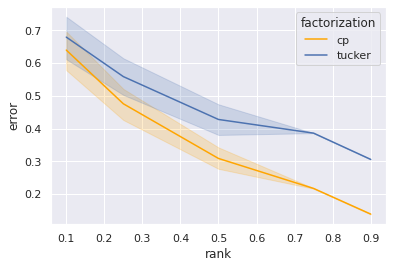

In [ ]:
# df = pd.DataFrame(results)
# df['rank'] = df['rank'].astype(float, copy=False)
# Plot the responses for different events and regions
ax = sns.lineplot(x="rank", y="error",
    hue="factorization",
    # style="rank",
    data=df,
    palette=['orange', 'b'],
)

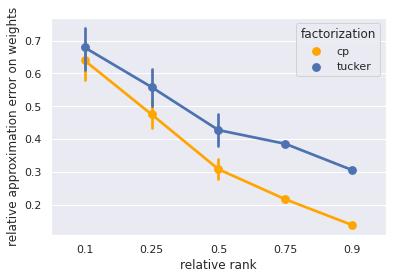

In [ ]:
ax = sns.pointplot(x="rank", y="error",
    hue="factorization",
    # style="rank",
    data=df,
    palette=['orange', 'b'],
)
ax = ax.set(xlabel='relative rank', ylabel='relative approximation error on weights')

[(0.865, 0.925)]

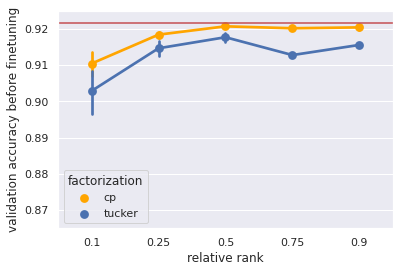

In [ ]:
ax = sns.pointplot(x="rank", y="valid_acc_before_ft",
    hue="factorization",
    # style="rank",
    data=df,
    palette=['orange', 'b'],
)
ax.set(xlabel='relative rank', ylabel='validation accuracy before finetuning')
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))

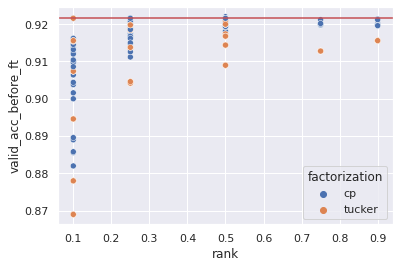

In [ ]:
ax = sns.scatterplot(x="rank", y="valid_acc_before_ft",
    hue="factorization",
    # style="factorization",
    data=df,
    # palette=['orange', 'black', 'red', 'green', 'blue', 'yellow'], #['orange','b']
)
ax = ax.axhline(baseline_result['best_valid_acc'], color='r')

In [16]:
ax = sns.scatterplot(x="rank", y="valid_acc",
    hue="factorization",
    # style="rank",
    data=df,
    palette=['orange', 'b'],
)
ax = ax.axhline(baseline_result['best_valid_acc'], color='r')

ValueError: The palette list has the wrong number of colors.

[(0.865, 0.925)]

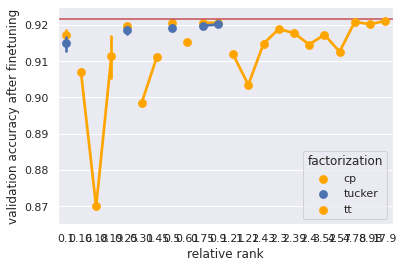

In [17]:
ax = sns.pointplot(x="rank", y="valid_acc",
    hue="factorization",
    # style="rank",
    data=df,
    palette=['orange', 'b'],
)
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(xlabel='relative rank', ylabel='validation accuracy after finetuning')
ax.set(ylim=(0.865, 0.925))

[Text(0.5, 0, 'relative rank'), Text(0, 0.5, 'test accuracy after finetuning')]

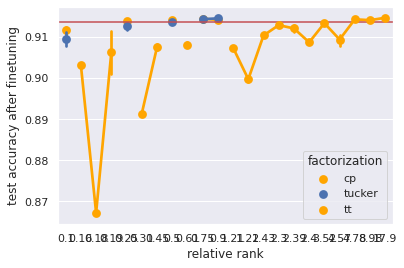

In [18]:
ax = sns.pointplot(x="rank", y="test_acc",
    hue="factorization",
    # style="rank",
    data=df,
    palette=['orange', 'b'],
)
ax.axhline(baseline_result['test_acc'], color='r')
ax.set(xlabel='relative rank', ylabel='test accuracy after finetuning')
# ax.set(ylim=(0.865, 0.925))

In [19]:
ax = sns.scatterplot(x="rank", y="test_acc",
    hue="factorization",
    # style="rank",
    data=df,
    palette=['orange', 'b'],
)
ax = ax.axhline(baseline_result['test_acc'], color='r')

ValueError: The palette list has the wrong number of colors.

In [20]:
# df = pd.DataFrame(results)
# df.set_index('error', inplace=True)
# grouped_df = df.groupby('factorization')
# grouped_df['rank'].plot(legend=True, style=".-", ylabel='relative rank', xlabel='relative approximation error')

In [21]:
# df = pd.DataFrame(results)
# df.set_index('error', inplace=True)
# grouped_df = df.groupby('factorization')
# grouped_df['valid_acc'].plot(legend=True, style=".", ylabel='validation accuracy after fine-tuning', xlabel='relative approximation error')

In [22]:
ax = sns.scatterplot(
    x="error", y="valid_acc_before_ft", 
    hue="factorization", 
    # style="factorization",
    data=df,
    palette=['orange', 'b'], 
)
ax.set(xlabel='relative approximation error on weights', ylabel='validation accuracy before fine-tuning')
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))

ValueError: Could not interpret value `error` for parameter `x`

In [23]:
ax = sns.scatterplot(x="error", y="valid_acc",
    hue="factorization", 
    data=df,
    palette=['orange', 'b'], 
)
ax.set(xlabel='relative approximation error on weights', ylabel='validation accuracy after fine-tuning')
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))

ValueError: Could not interpret value `error` for parameter `x`

In [24]:
ax = sns.scatterplot(x="error", y="test_acc",
    hue="factorization", data=df,
    palette=['orange', 'b'],
)
ax.set(xlabel='relative approximation error on weights', ylabel='test accuracy after fine-tuning')
ax.axhline(baseline_result['test_acc'], color='g')
ax.set(ylim=(0.865, 0.925))

ValueError: Could not interpret value `error` for parameter `x`

In [25]:
g = sns.lmplot(x="error", y="valid_acc",
    hue="factorization", data=df,
    # y_jitter=.02, 
    # logistic=True, 
    # style="rank",
    truncate=False, palette=['orange', 'b'], 
)
g = g.set(xlabel='relative approximation error', ylabel='validation accuracy after fine-tuning')


KeyError: "['error'] not in index"

In [26]:
df['fact_rank'] = df['factorization'] + '-' + df['rank'].apply(str)
df.head()

name  nr  relative_norm_weight  scaled_norm_weight  diff_norm_weight  \
0  conv2  63              0.311843            0.000023         54.784103   
1  conv1  60              0.337100            0.000027         62.611729   
2  conv1  60              0.272814            0.000021         50.671532   
4  conv1  28              0.823151            0.000408         60.229858   
5  conv1  28              0.305965            0.000152         22.387421   

  layers factorization  rank  valid_acc  valid_acc_before_ft  ...  test_error  \
0     63            cp  0.10     0.9210               0.9216  ...      0.0857   
1     60        tucker  0.10     0.9206               0.9216  ...      0.0863   
2     60        tucker  0.25     0.9210               0.9216  ...      0.0852   
4     28        tucker  0.10     0.9018               0.8690  ...      0.1026   
5     28        tucker  0.90     0.9182               0.9156  ...      0.0855   

   valid_error_before_ft  valid_error  log_test_error_before_ft  \
0                 0.0784       0.0790                 -2.451085   
1                 0.0784       0.0794                 -2.451085   
2                 0.0784       0.0790                 -2.451085   
4                 0.1310       0.0982                 -1.973281   
5                 0.0844       0.0818                 -2.458070   

  log_test_error  log_valid_error_before_ft  log_valid_error    fact_rank  \
0      -2.456902                  -2.545931        -2.538307       cp-0.1   
1      -2.449926                  -2.545931        -2.533257   tucker-0.1   
2      -2.462754                  -2.545931        -2.538307  tucker-0.25   
4      -2.276917                  -2.032558        -2.320749   tucker-0.1   
5      -2.459239                  -2.472188        -2.503478   tucker-0.9   

   fact_layers  layers_fact  
0        cp-63        63-cp  
1    tucker-60    60-tucker  
2    tucker-60    60-tucker  
4    tucker-28    28-tucker  
5    tucker-28    28-tucker  

[5 rows x 32 columns]

In [27]:
# g = sns.lmplot(x="error", y="test_acc", 
#    hue="fact_rank", 
#    data=df,
#    truncate=False, 
#    # palette=['orange','b'],
# )
# g.set(xlabel='relative approximation error', ylabel='test accuracy after fine-tuning')
# g.set(ylim=(0.935, 0.945))

In [28]:
ax = sns.lmplot(x="error", y="test_acc", 
   hue="factorization", 
   data=df,
   # logistic=True,
   truncate=False, 
   palette=['orange','b'],
)
ax.set(xlabel='relative approximation error', ylabel='test accuracy after fine-tuning')


KeyError: "['error'] not in index"

In [ ]:
# df = pd.DataFrame(results)
# df.set_index('error', inplace=True)
# grouped_df = df.groupby('factorization')
# grouped_df['valid_acc_before_ft'].plot(legend=True, style=".", ylabel='validation accuracy before fine-tuning', xlabel='relative approximation error')

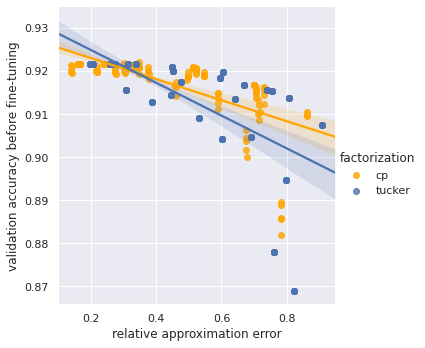

In [ ]:
g = sns.lmplot(x="error", y="valid_acc_before_ft", hue="factorization", data=df,
            #    y_jitter=.02, 
               # logistic=True, 
               truncate=False, 
               palette=['orange', 'b'], 
               )
g.set(xlabel='relative approximation error', ylabel='validation accuracy before fine-tuning')

In [ ]:
df_layers = pd.DataFrame(results)
df_layers['rank'] = df_layers['rank'].astype(float, copy=False)
df_layers = df_layers.loc[df_layers['rank'] == 0.5]
df_layers

name  nr     error  layers factorization  rank  valid_acc  \
5    conv2  63  0.198279      63        tucker   0.5     0.9210   
9    conv2  15  0.304725      15            cp   0.5     0.9206   
12   conv2  38  0.346829      38            cp   0.5     0.9212   
22   conv2  15  0.301261      15            cp   0.5     0.9200   
26   conv1  28  0.375088      28            cp   0.5     0.9186   
..     ...  ..       ...     ...           ...   ...        ...   
250  conv2  63  0.160493      63            cp   0.5     0.9200   
251  conv1  60  0.167152      60            cp   0.5     0.9210   
255  conv1  44  0.447319      44        tucker   0.5     0.9212   
256  conv2  63  0.160246      63            cp   0.5     0.9198   
257  conv2  38  0.452808      38        tucker   0.5     0.9206   

     valid_acc_before_ft  n_param_fact  test_acc       lr optimizer  \
5                 0.9216       9997024    0.9145  0.00001      adam   
9                 0.9198      11155728    0.9140  0.00001      adam   
12                0.9208      10879449    0.9119  0.00001      adam   
22                0.9218      11155728    0.9141  0.00001      adam   
26                0.9198      11100409    0.9134  0.00001      adam   
..                   ...           ...       ...      ...       ...   
250               0.9216       9995161    0.9147  0.00001      adam   
251               0.9216       9995161    0.9153  0.00001      adam   
255               0.9210      10879741    0.9150  0.00001      adam   
256               0.9216       9995161    0.9149  0.00001      adam   
257               0.9200      10879741    0.9152  0.00001      adam   

      norm_diff       norm_b      n_b  relative_norm  scaled_norm  
5      6.153332   429.339663   2048.0       0.014415     0.003005  
9     47.736296   545.957711  16384.0       0.087451     0.002914  
12    54.038538   420.262521   4096.0       0.128686     0.013193  
22    47.295244   545.957711  16384.0       0.086648     0.002887  
26   110.821921   815.280181   8192.0       0.135994     0.013528  
..          ...          ...      ...            ...          ...  
250    4.984808   429.339663   2048.0       0.011677     0.002434  
251   20.135873  2603.942812   2048.0       0.007780     0.009832  
255  135.603151   726.060440   4096.0       0.186951     0.033106  
256    4.885679   429.339663   2048.0       0.011455     0.002386  
257   92.270423   420.262521   4096.0       0.219677     0.022527  

[80 rows x 17 columns]

In [29]:
df_layers_idx = df_layers.set_index('layers', inplace=False)
grouped_df_layers = df_layers_idx.groupby('factorization')
ax = grouped_df_layers['error'].plot(legend=True, style=".", ylabel='relative approximation error')

NameError: name 'df_layers' is not defined

In [30]:
# df_layers = pd.DataFrame(results_layers)
# df_layers.set_index('layers', inplace=True)
# grouped_df = df_layers.groupby('factorization')
# grouped_df['error'].plot(legend=True, style=".-", ylabel='relative approximation error')

# ax = grouped_df_layers['valid_acc'].plot(legend=True, style=".", ylabel='validation accuracy after fine-tuning', xlabel='relative approximation error')

In [31]:
# df_layers = pd.DataFrame(results_layers)
# df_layers.set_index('error', inplace=True)
# grouped_df = df_layers.groupby('factorization')
# grouped_df['valid_acc_before_ft'].plot(legend=True, style=".", ylabel='validation accuracy before fine-tuning', xlabel='relative approximation error')

In [32]:
# df = pd.DataFrame(results)
# df['rank'] = df['rank'].astype(float, copy=False)

# Plot the responses for different events and regions
ax = sns.lineplot(x="layers", y="error",
             hue="factorization", 
            #  style="rank",
             data=df_layers,
             palette=['orange', 'b'],
             )

NameError: name 'df_layers' is not defined

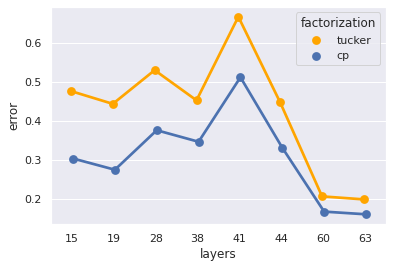

In [ ]:
ax = sns.pointplot(x="layers", y="error",
             hue="factorization", 
            #  style="rank",
             data=df_layers,
             palette=['orange', 'b'],
             dodge=True
             )

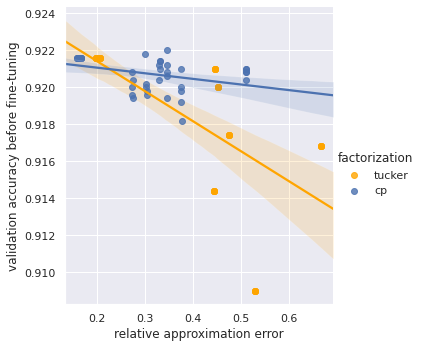

In [ ]:
g = sns.lmplot(x="error", y="valid_acc_before_ft", hue="factorization", data=df_layers,
            #    y_jitter=.02, 
               # logistic=True, 
               truncate=False, 
               palette=['orange', 'b'], 
               )
g.set(xlabel='relative approximation error', ylabel='validation accuracy before fine-tuning')

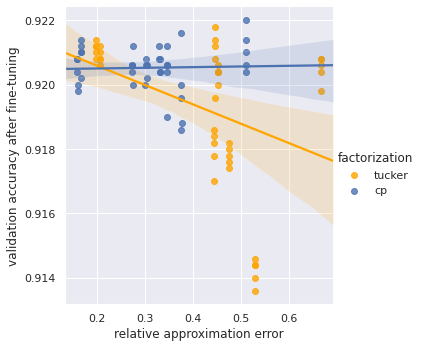

In [ ]:
g = sns.lmplot(x="error", y="valid_acc", hue="factorization", data=df_layers,
            #    y_jitter=.02, 
               # logistic=True, 
               truncate=False, 
               palette=['orange', 'b'], 
               )
g.set(xlabel='relative approximation error', ylabel='validation accuracy after fine-tuning')

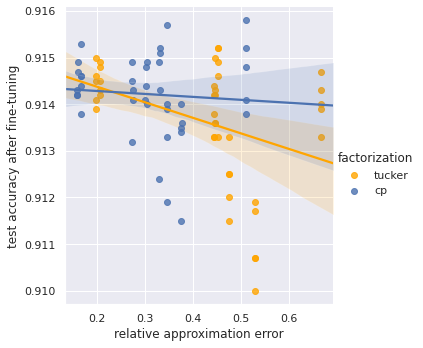

In [ ]:
g = sns.lmplot(x="error", y="test_acc", hue="factorization", data=df_layers,
            #    y_jitter=.02, 
               # logistic=True, 
               truncate=False, 
               palette=['orange', 'b'], 
               )
g.set(xlabel='relative approximation error', ylabel='test accuracy after fine-tuning')

In [33]:
ax = sns.scatterplot(x="layers", y="valid_acc_before_ft",
    hue="factorization", 
    # style="rank",
    data=df_layers,
    palette=['orange', 'b'],
    # dodge=True,
    )
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(xlabel='layer number', ylabel='validation accuracy before fine-tuning')
# ax.set(ylim=(0.908, 0.9220))

NameError: name 'df_layers' is not defined

[(0.908, 0.922)]

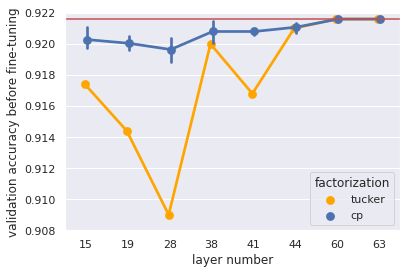

In [ ]:
ax = sns.pointplot(x="layers", y="valid_acc_before_ft",
    hue="factorization", 
    # style="rank",
    data=df_layers,
    palette=['orange', 'b'],
    dodge=True,
    )
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(xlabel='layer number', ylabel='validation accuracy before fine-tuning')
ax.set(ylim=(0.908, 0.9220))

In [34]:
ax = sns.pointplot(x="layers", y="valid_acc",
    hue="factorization", 
    # style="rank",
    data=df_layers,
    palette=['orange', 'b'],
    dodge=True,
    )
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(xlabel='layer number', ylabel='validation accuracy after fine-tuning')
ax.set(ylim=(0.908, 0.9220))


NameError: name 'df_layers' is not defined

In [35]:
ax = sns.pointplot(x="layers", y="test_acc",
             hue="factorization", 
            #  style="rank",
             data=df_layers,
             palette=['orange', 'b'],
             dodge=True)
ax.axhline(baseline_result['test_acc'], color='r')
ax.set(xlabel='layer number', ylabel='test accuracy after fine-tuning')

NameError: name 'df_layers' is not defined

In [36]:
df.factorization.isna()

0      False
1      False
2      False
4      False
5      False
       ...  
615    False
616    False
617    False
618    False
619    False
Name: factorization, Length: 539, dtype: bool

In [37]:
df[df.error.isnull()]

AttributeError: 'DataFrame' object has no attribute 'error'

In [38]:
df_layer_rank = df.groupby(['factorization','layers','rank'])
df_std = df_layer_rank[['valid_acc','test_acc']].std()

print(df_std.to_latex())

# df.to_json("/home/jetzeschuurman/gitProjects/phd/tddl/artifacts/f_mnist/std_adam.json")

\begin{tabular}{lllrr}
\toprule
       &    &       &  valid\_acc &  test\_acc \\
factorization & layers & rank &            &           \\
\midrule
cp & 15 & 0.10  &   0.000687 &  0.000886 \\
       &    & 0.16  &        NaN &       NaN \\
       &    & 0.18  &        NaN &       NaN \\
       &    & 0.19  &        NaN &       NaN \\
       &    & 0.25  &   0.000876 &  0.000358 \\
       &    & 0.31  &        NaN &       NaN \\
       &    & 0.45  &        NaN &       NaN \\
       &    & 0.50  &   0.000329 &  0.000404 \\
       &    & 0.61  &        NaN &       NaN \\
       &    & 0.75  &   0.000469 &  0.000418 \\
       &    & 0.90  &   0.000482 &  0.000235 \\
       &    & 1.21  &        NaN &       NaN \\
       &    & 1.22  &        NaN &       NaN \\
       &    & 1.43  &        NaN &       NaN \\
       &    & 2.30  &        NaN &       NaN \\
       &    & 2.39  &        NaN &       NaN \\
       &    & 2.40  &        NaN &       NaN \\
       &    & 3.52  &        NaN &     

## Analysis on the features space

### Relative Norm

[(0.865, 0.925)]

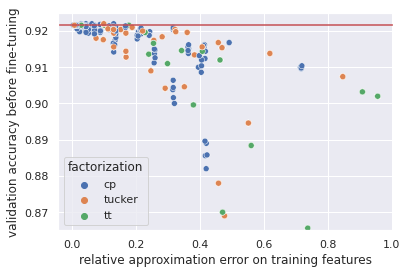

In [39]:
ax = sns.scatterplot(
    x="relative_norm", y="valid_acc_before_ft", 
     hue="factorization", 
    # style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(
    xlabel='relative approximation error on training features', 
    ylabel='validation accuracy before fine-tuning'
)
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))

[(0.865, 0.925)]

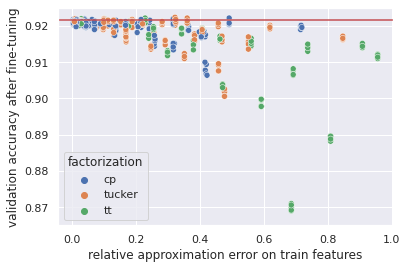

In [40]:
ax = sns.scatterplot(x="relative_norm", y="valid_acc",
     hue="factorization", 
    # style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(xlabel='relative approximation error on train features', ylabel='validation accuracy after fine-tuning')
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))

In [41]:
ax = sns.scatterplot(x="relative_norm", y="test_acc",
    hue="factorization", data=df,
    palette=['orange', 'b'],
)
ax.set(xlabel='relative approximation error on train features', ylabel='test accuracy after fine-tuning')
ax.axhline(baseline_result['test_acc'], color='g')
ax.set(ylim=(0.865, 0.925))

ValueError: The palette list has the wrong number of colors.

### Scaled Norm

In [42]:
ax = sns.scatterplot(
    x="scaled_norm", y="valid_acc_before_ft", 
    hue="factorization", 
    data=df,
    palette=['orange', 'b'], 
)
ax.set(
    xlabel='scaled norm of training features', 
    ylabel='validation accuracy before fine-tuning'
)
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))

ValueError: The palette list has the wrong number of colors.

In [43]:
ax = sns.scatterplot(x="scaled_norm", y="valid_acc",
    hue="factorization", data=df,
    palette=['orange', 'b'], 
)
ax.set(xlabel='scaled norm of train features', ylabel='validation accuracy after fine-tuning')
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))

ValueError: The palette list has the wrong number of colors.

In [44]:
ax = sns.scatterplot(x="scaled_norm", y="test_acc",
    hue="factorization", data=df,
    palette=['orange', 'b'],
)
ax.set(xlabel='scaled norm of train features', ylabel='test accuracy after fine-tuning')
ax.axhline(baseline_result['test_acc'], color='g')
ax.set(ylim=(0.865, 0.925))

ValueError: The palette list has the wrong number of colors.

### Absolute Norm

In [45]:
ax = sns.scatterplot(
    x="norm_diff", y="valid_acc_before_ft", 
    hue="factorization", 
    data=df,
    palette=['orange', 'b'], 
)
ax.set(
    xlabel='Absolute norm on training features', 
    ylabel='validation accuracy before fine-tuning'
)
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))

ValueError: The palette list has the wrong number of colors.

[(0.865, 0.925)]

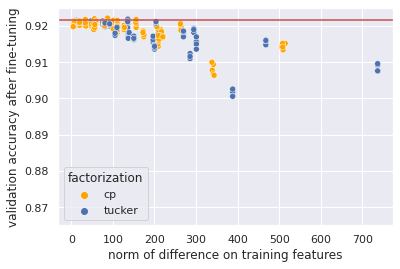

In [ ]:
ax = sns.scatterplot(x="norm_diff", y="valid_acc",
    hue="factorization", data=df,
    palette=['orange', 'b'], 
)
ax.set(xlabel='Absolute norm on training features', ylabel='validation accuracy after fine-tuning')
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))

[(0.865, 0.925)]

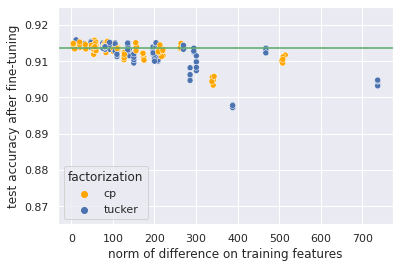

In [ ]:
ax = sns.scatterplot(x="norm_diff", y="test_acc",
    hue="factorization", data=df,
    palette=['orange', 'b'],
)
ax.set(xlabel='Absolute norm on training features', ylabel='test accuracy after fine-tuning')
ax.axhline(baseline_result['test_acc'], color='g')
ax.set(ylim=(0.865, 0.925))

In [ ]:
import numpy as np
df['log_norm_diff'] = np.log(df.norm_diff)

In [46]:
ax = sns.scatterplot(x="log_norm_diff", y="test_acc",
    hue="factorization", data=df,
    palette=['orange', 'b'],
)
ax.set(
    xlabel='Log absolute norm on training features', 
    ylabel='Test accuracy after fine-tuning')
ax.axhline(baseline_result['test_acc'], color='g')
ax.set(ylim=(0.865, 0.925))

ValueError: Could not interpret value `log_norm_diff` for parameter `x`

In [ ]:
df['log_test_acc'] = np.log(df.test_acc)

In [47]:
ax = sns.scatterplot(x="log_norm_diff", y="log_test_acc",
    hue="factorization", data=df,
    palette=['orange', 'b'],
)
ax.set(
    xlabel='Log Absolute norm on training features', 
    ylabel='Log test accuracy after fine-tuning')
ax.axhline(np.log(baseline_result['test_acc']), color='g')
# ax.set(ylim=(0.865, 0.925))

ValueError: Could not interpret value `log_norm_diff` for parameter `x`

# Per Layer

In [48]:
df.columns

Index(['name', 'nr', 'relative_norm_weight', 'scaled_norm_weight',
       'diff_norm_weight', 'layers', 'factorization', 'rank', 'valid_acc',
       'valid_acc_before_ft', 'test_acc_before_ft', 'n_param_fact', 'test_acc',
       'lr', 'optimizer', 'norm_diff', 'norm_b', 'n_b', 'relative_norm',
       'scaled_norm', 'actual_rank', 'test_error_before_ft', 'test_error',
       'valid_error_before_ft', 'valid_error', 'log_test_error_before_ft',
       'log_test_error', 'log_valid_error_before_ft', 'log_valid_error',
       'fact_rank', 'fact_layers', 'layers_fact'],
      dtype='object')

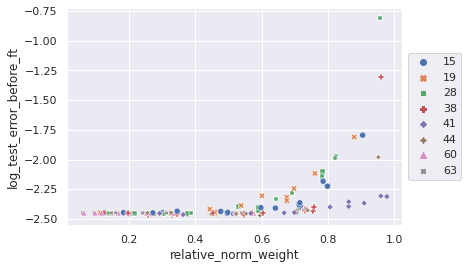

In [49]:
ax = sns.scatterplot(x="relative_norm_weight", y="log_test_error_before_ft",
    hue="layers",
    style="layers",
    data=df,
    # palette=['orange', 'black', 'red', 'green', 'blue', 'yellow'], #['orange','b']
)
# ax.set(xlabel='relative approximation error on weights', ylabel='validation accuracy after fine-tuning')
# ax.axhline(baseline_result['best_valid_acc'], color='r')
# ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

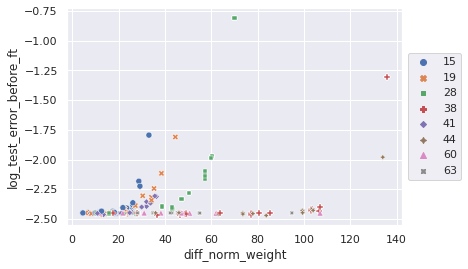

In [50]:
ax = sns.scatterplot(x="diff_norm_weight", y="log_test_error_before_ft",
    hue="layers",
    style="layers",
    data=df,
    # palette=['orange', 'black', 'red', 'green', 'blue', 'yellow'], #['orange','b']
)
# ax.set(xlabel='relative approximation error on weights', ylabel='validation accuracy after fine-tuning')
# ax.axhline(baseline_result['best_valid_acc'], color='r')
# ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

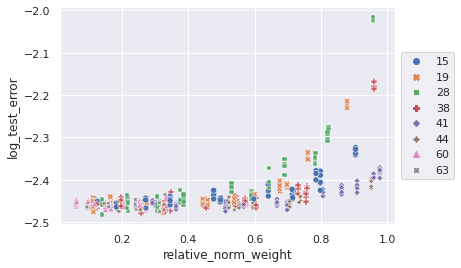

In [51]:
ax = sns.scatterplot(x="relative_norm_weight", y="log_test_error",
    hue="layers",
    style="layers",
    data=df,
    # palette=['orange', 'black', 'red', 'green', 'blue', 'yellow'], #['orange','b']
)
# ax.set(xlabel='relative approximation error on weights', ylabel='validation accuracy after fine-tuning')
# ax.axhline(baseline_result['best_valid_acc'], color='r')
# ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

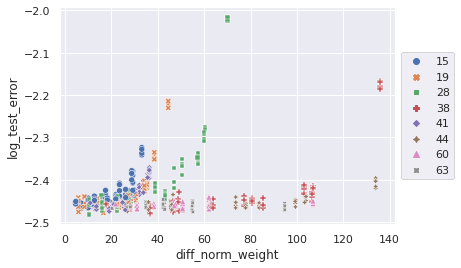

In [52]:
ax = sns.scatterplot(x="diff_norm_weight", y="log_test_error",
    hue="layers",
    style="layers",
    data=df,
    # palette=['orange', 'black', 'red', 'green', 'blue', 'yellow'], #['orange','b']
)
# ax.set(xlabel='relative approximation error on weights', ylabel='validation accuracy after fine-tuning')
# ax.axhline(baseline_result['best_valid_acc'], color='r')
# ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fa351e65220> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


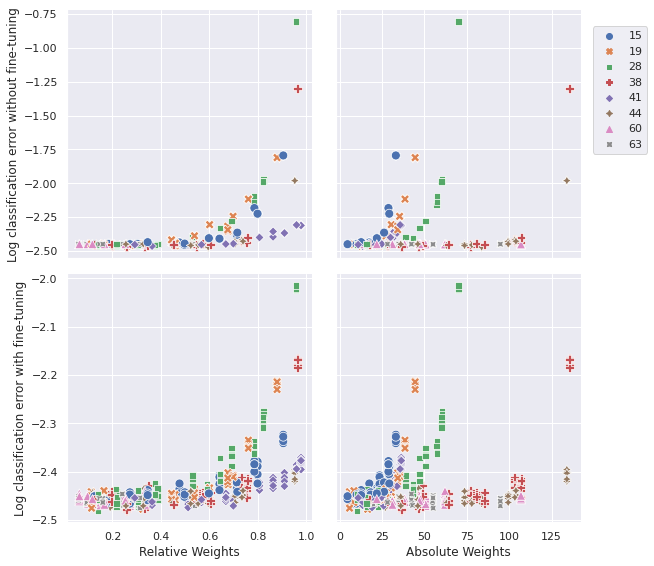

In [53]:
from matplotlib import pyplot as plt 

replacements = {
    # 'valid_acc_before_ft': "Validation accuracy before fine-tuning", 
    # 'valid_acc': "Validation accuracy after fine-tuning",
    # 'test_acc': "Test accuracy after fine-tuning", 
    # 'error': 'Relative norm on weights',
    # 'relative_norm': 'Relative norm on training features',
    # 'scaled_norm': 'Scaled norm on training features',
    # 'norm_diff': 'Absolute norm on training features',
    # 'log_norm_diff': 'Log absolute norm on training features',
    'log_test_error_before_ft': "Log classification error without fine-tuning",
    'log_test_error':"Log classification error with fine-tuning",
    'relative_norm_weight': "Relative Weights",
    'diff_norm_weight': "Absolute Weights",
}

metrics=['test_error_before_ft','test_error']
log_metrics=['log_test_error_before_ft','log_test_error']
errors=['relative_norm_weight','diff_norm_weight'] # 'relative_norm','scaled_norm_weight','scaled_norm',,'norm_diff'

g = sns.PairGrid(
    df,
    y_vars=log_metrics, 
    x_vars=errors, # "error"
    height=4,
)
g.map(lambda x, y, **kwargs: sns.scatterplot(x=x,y=y,hue=df.layers,style=df.layers,legend='auto',s=80)) # color=".3")
# g.set(ylim=(0.86,0.925))
g.add_legend()

def error(accuracy):
    return 1-accuracy

def log_error(accuracy):
    return np.log(1-accuracy)

lines = {
    0: {
        "y":error(baseline_result['best_valid_acc']),
        "color":'black',
    },
    1: {
        "y":error(baseline_result['best_valid_acc']),
        "color":'black',
    },
    2: {
        "y":error(baseline_result['test_acc']),
        "color":'black',
    },
}

for i in range(2):
    for j in range(2):
        gax = g.axes[i][j]
#         gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
plt.legend(
    bbox_to_anchor=(1.05, 1,1,1),
    loc='upper left', borderaxespad=0.
    # loc='right',
    # bbox_to_anchor=(1.1, 0.5, 0, 0),
)
# g.fig.get_children()[-1].set_bbox_to_anchor((1.1, 0.5, 0, 0))

g.savefig("../../plots/rn18_scatter_relative_absolute.pdf")

## Feature Space

### Relative Norm

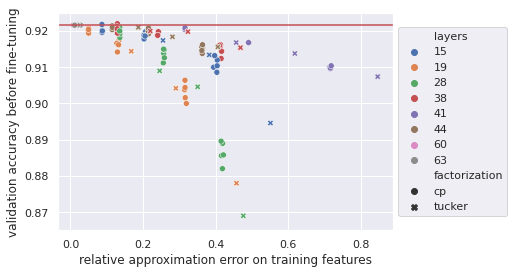

In [15]:
ax = sns.scatterplot(
    x="relative_norm", y="valid_acc_before_ft", 
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(
    xlabel='relative approximation error on training features', 
    ylabel='validation accuracy before fine-tuning'
)
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

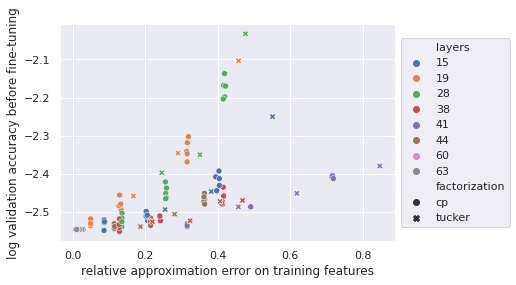

In [16]:
ax = sns.scatterplot(
    x="relative_norm", y="log_valid_error_before_ft", 
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(
    xlabel='relative approximation error on training features', 
    ylabel='log validation accuracy before fine-tuning'
)
# ax.axhline(baseline_result['best_valid_acc'], color='r')
# ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

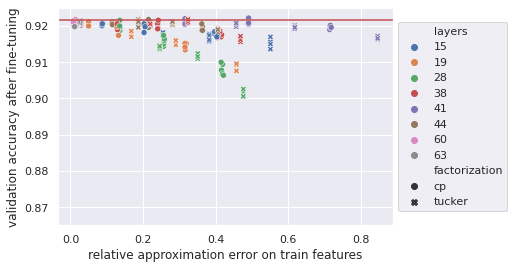

In [17]:
ax = sns.scatterplot(x="relative_norm", y="valid_acc",
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(xlabel='relative approximation error on train features', ylabel='validation accuracy after fine-tuning')
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

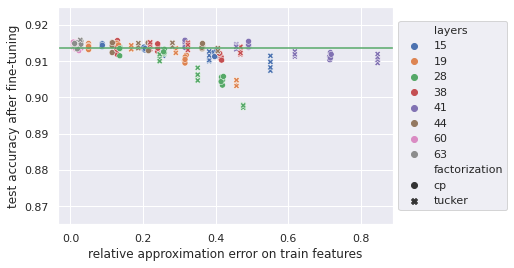

In [18]:
ax = sns.scatterplot(x="relative_norm", y="test_acc",
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(xlabel='relative approximation error on train features', ylabel='test accuracy after fine-tuning')
ax.axhline(baseline_result['test_acc'], color='g')
ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Scaled Norm

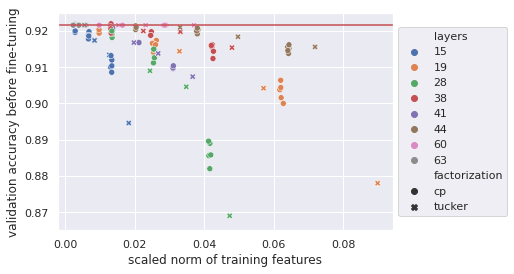

In [19]:
ax = sns.scatterplot(
    x="scaled_norm", y="valid_acc_before_ft", 
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(
    xlabel='scaled norm of training features', 
    ylabel='validation accuracy before fine-tuning'
)
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

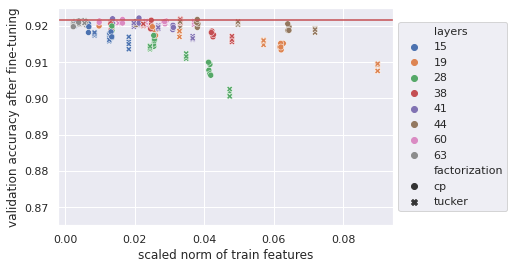

In [20]:
ax = sns.scatterplot(x="scaled_norm", y="valid_acc",
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(xlabel='scaled norm of train features', ylabel='validation accuracy after fine-tuning')
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

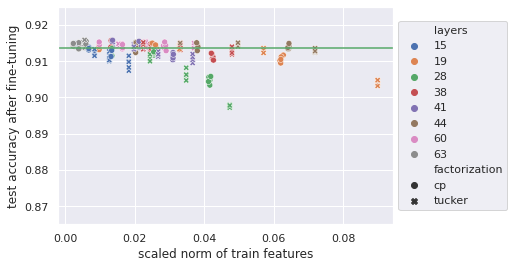

In [21]:
ax = sns.scatterplot(x="scaled_norm", y="test_acc",
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(xlabel='scaled norm of train features', ylabel='test accuracy after fine-tuning')
ax.axhline(baseline_result['test_acc'], color='g')
ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Absolute Norm

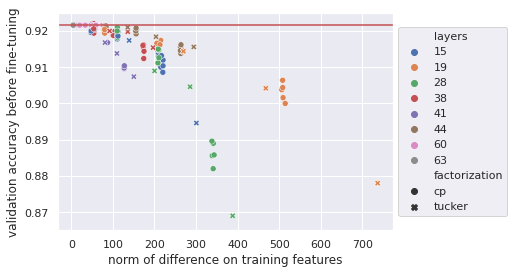

In [22]:
ax = sns.scatterplot(
    x="norm_diff", y="valid_acc_before_ft", 
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(
    xlabel='Absolute norm on training features', 
    ylabel='Validation accuracy before fine-tuning'
)
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

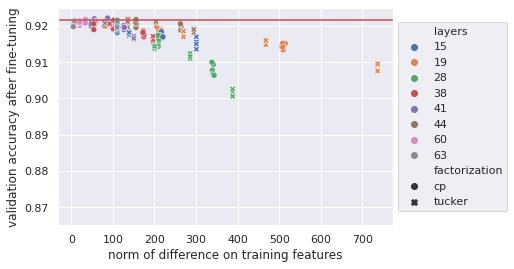

In [23]:
ax = sns.scatterplot(x="norm_diff", y="valid_acc",
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(xlabel='Absolute norm on training features', ylabel='validation accuracy after fine-tuning')
ax.axhline(baseline_result['best_valid_acc'], color='r')
ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

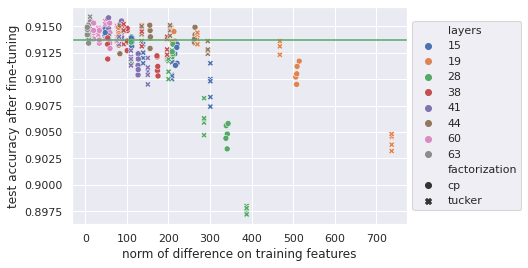

In [24]:
ax = sns.scatterplot(x="norm_diff", y="test_acc",
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(xlabel='Absolute norm on training features', ylabel='test accuracy after fine-tuning')
ax.axhline(baseline_result['test_acc'], color='g')
# ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [25]:
import numpy as np
df['log_norm_diff'] = np.log(df.norm_diff)

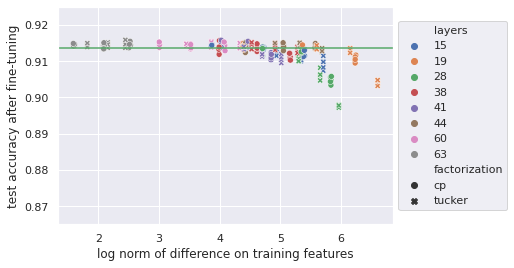

In [26]:
ax = sns.scatterplot(x="log_norm_diff", y="test_acc",
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(xlabel='Absolute log norm on training features', ylabel='test accuracy after fine-tuning')
ax.axhline(baseline_result['test_acc'], color='g')
ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [27]:
df['log_test_acc'] = np.log(df.test_acc)

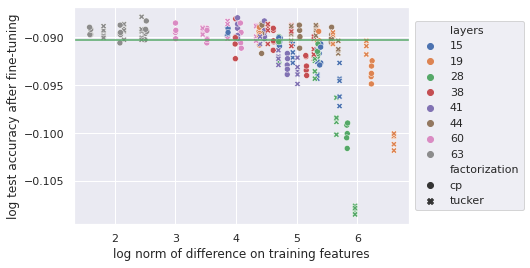

In [28]:
ax = sns.scatterplot(x="log_norm_diff", y="log_test_acc",
    hue="layers", 
    style="factorization",
    data=df,
    # palette=['orange', 'b'], 
)
ax.set(xlabel='Log Absolute norm on training features', ylabel='Log test accuracy after fine-tuning')
ax.axhline(np.log(baseline_result['test_acc']), color='g')
# ax.set(ylim=(0.865, 0.925))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

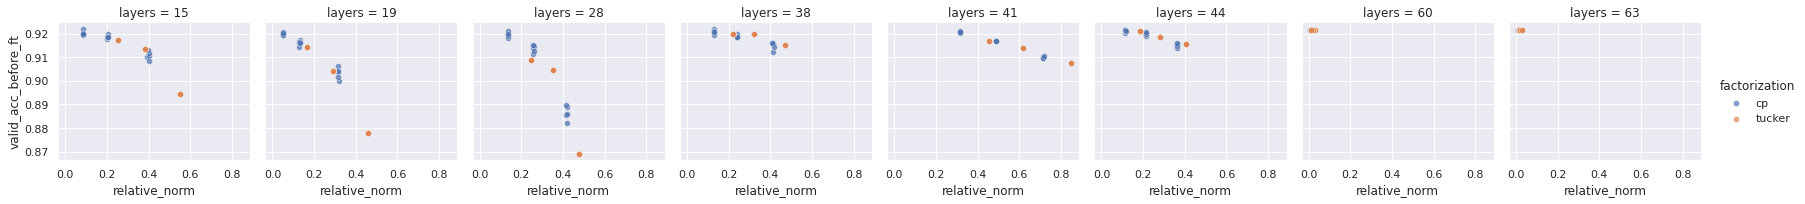

In [29]:
g = sns.FacetGrid(df, col="layers", hue="factorization")
g.map(sns.scatterplot, "relative_norm", "valid_acc_before_ft", alpha=.7)
g.add_legend()

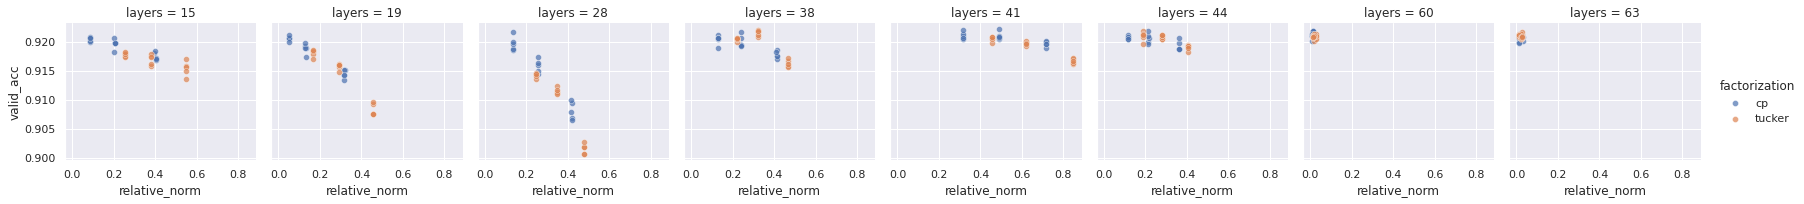

In [30]:
g = sns.FacetGrid(df, col="layers", hue="factorization")
g.map(sns.scatterplot, "relative_norm", "valid_acc", alpha=.7)
g.add_legend()

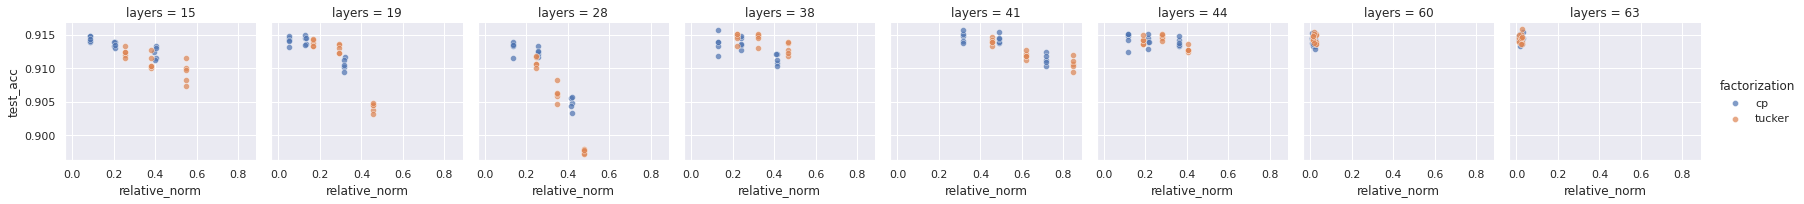

In [31]:
g = sns.FacetGrid(df, col="layers", hue="factorization")
g.map(sns.scatterplot, "relative_norm", "test_acc", alpha=.7)
g.add_legend()
# g.axhline(np.log(baseline_result['test_acc']), color='g')

In [108]:
replacements = {
    'valid_acc_before_ft': "Validation accuracy before fine-tuning", 
    'valid_acc': "Validation accuracy after fine-tuning",
    'test_acc': "Test accuracy after fine-tuning", 
    'error': 'Relative norm on weights',
    'relative_norm': 'Relative norm on training features',
    'scaled_norm': 'Scaled norm on training features',
    'norm_diff': 'Absolute norm on training features',
    'log_norm_diff': 'Log absolute norm on training features',
}

KeyError: "['error'] not in index"

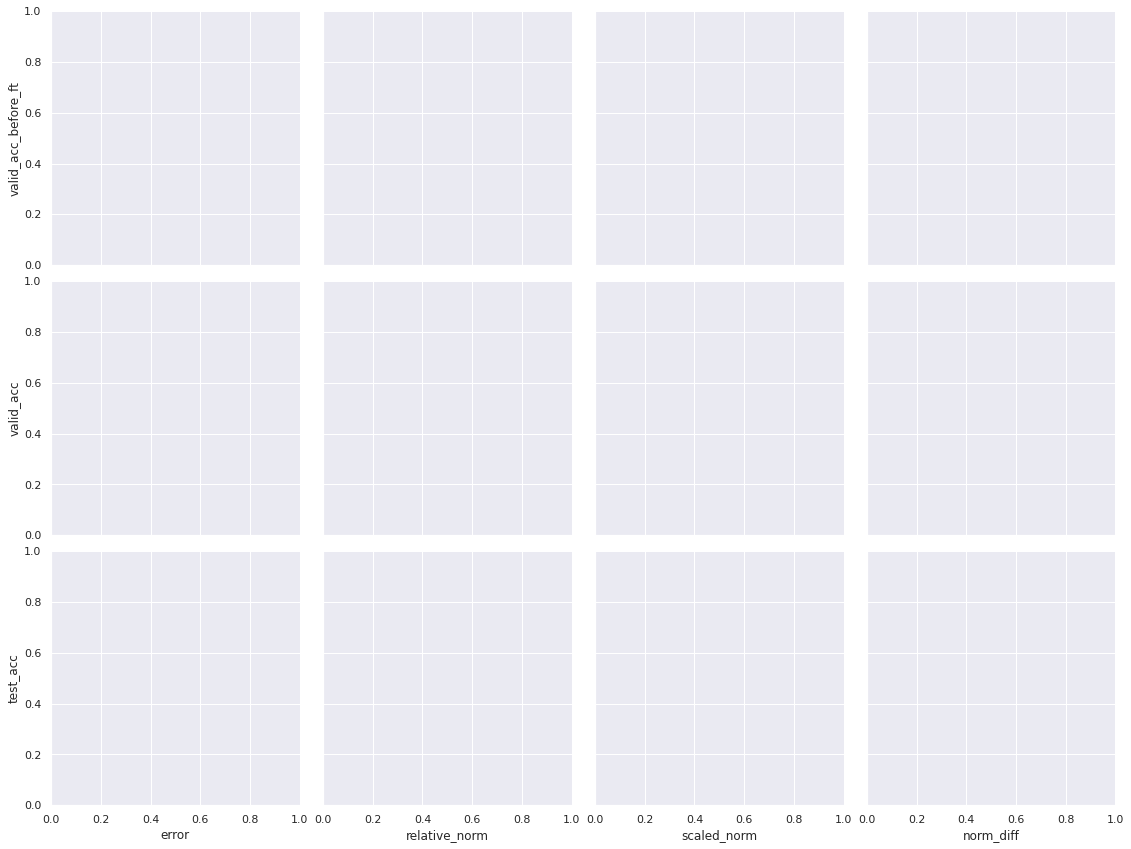

In [109]:
g = sns.PairGrid(
    df,
    y_vars=["valid_acc_before_ft", "valid_acc","test_acc"], 
    x_vars=["error", "relative_norm", "scaled_norm" ,"norm_diff"],
    hue="layers",
    height=4,
    # style="factorization",
) #, height=4)
g.map(sns.scatterplot) # color=".3")
g.set(ylim=(0.86,0.925))
# g.set(ylim=(-1, 11), yticks=[0, 5, 10])
g.add_legend()

lines = {
    0: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    1: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    2: {
        "y":baseline_result['test_acc'],
        "color":'black',
    },
}

for i in range(3):
    for j in range(4):
        gax = g.axes[i][j]
        gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])



In [110]:
df.relative_norm

0      0.028521
1      0.029340
2      0.018346
3      0.476089
5      0.014415
         ...   
255    0.186951
256    0.011455
257    0.219677
258    0.550880
259    0.406067
Name: relative_norm, Length: 240, dtype: float64

In [48]:
replacements = {
    'valid_acc_before_ft': "Validation accuracy before fine-tuning", 
    'valid_acc': "Validation accuracy after fine-tuning",
    'test_acc': "Test accuracy after fine-tuning", 
    'relative_norm_weight': 'Relative Weights',
    'scaled_norm_weight': 'Scaled Weights',
    'diff_norm_weight': 'Absolute Weights',
    'relative_norm': 'Relative Features',
    'scaled_norm': 'Scaled Features',
    'norm_diff': 'Absolute Features',
    'log_valid_error_before_ft': 'Log Validation error before fine-tuning',
    'log_valid_error': 'Log Validation error after fine-tuning',
    'log_test_error': 'Log Test error after fine-tuning',
    'valid_error_before_ft': 'Validation error before fine-tuning',
    'valid_error': 'Validation error after fine-tuning',
    'test_error': 'Test error after fine-tuning'
    # 'log_norm_diff': 'Log absolute norm between training features',
}

/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7ff4b74e7eb0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


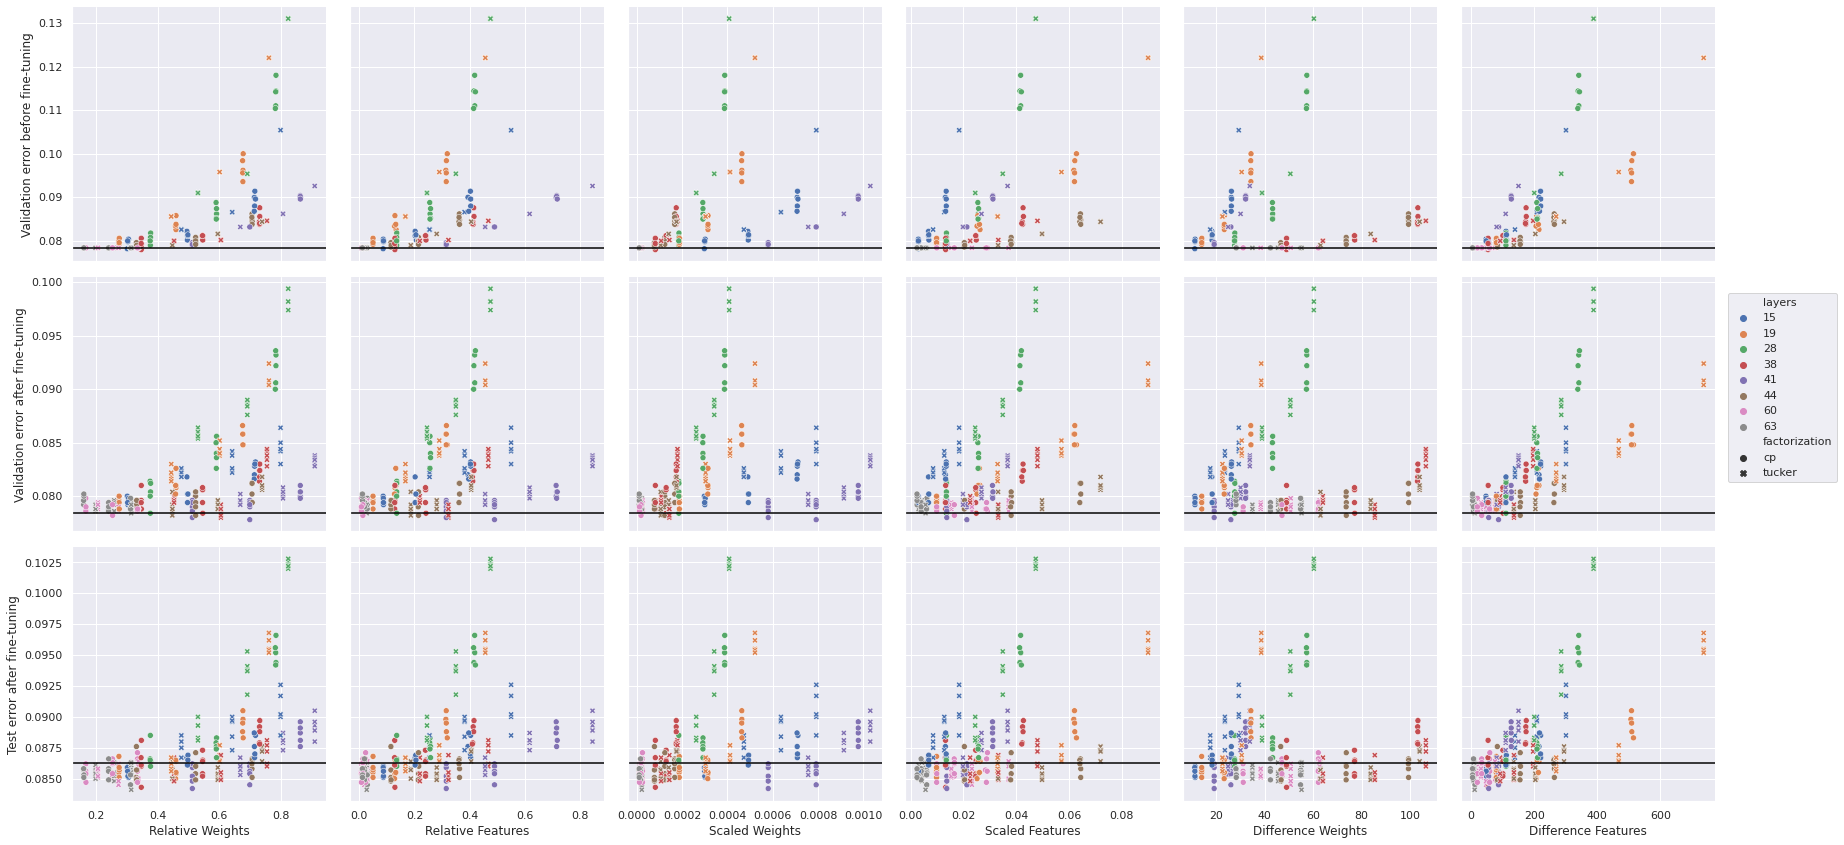

In [49]:
from matplotlib import pyplot as plt 

metrics=['valid_error_before_ft','valid_error','test_error']
log_metrics=['log_valid_error_before_ft','log_valid_error','log_test_error']
errors=['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff']

g = sns.PairGrid(
    df,
    y_vars=metrics, 
    x_vars=errors, # "error"
    height=4,
)
g.map(lambda x, y, **kwargs: sns.scatterplot(x=x,y=y,hue=df.layers,style=df.factorization,legend='auto')) # color=".3")
# g.set(ylim=(0.86,0.925))
g.add_legend()

def error(accuracy):
    return 1-accuracy

def log_error(accuracy):
    return np.log(1-accuracy)

lines = {
    0: {
        "y":error(baseline_result['best_valid_acc']),
        "color":'black',
    },
    1: {
        "y":error(baseline_result['best_valid_acc']),
        "color":'black',
    },
    2: {
        "y":error(baseline_result['test_acc']),
        "color":'black',
    },
}

for i in range(3):
    for j in range(6):
        gax = g.axes[i][j]
        gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
plt.legend(
    bbox_to_anchor=(1.05, 1,1,1),
    loc='upper left', borderaxespad=0.
    # loc='right',
    # bbox_to_anchor=(1.1, 0.5, 0, 0),
)
# g.fig.get_children()[-1].set_bbox_to_anchor((1.1, 0.5, 0, 0))

g.savefig("../../plots/cifar10/rn18/scatter_errors_performances_layers_factorizations")

KeyError: 'error'

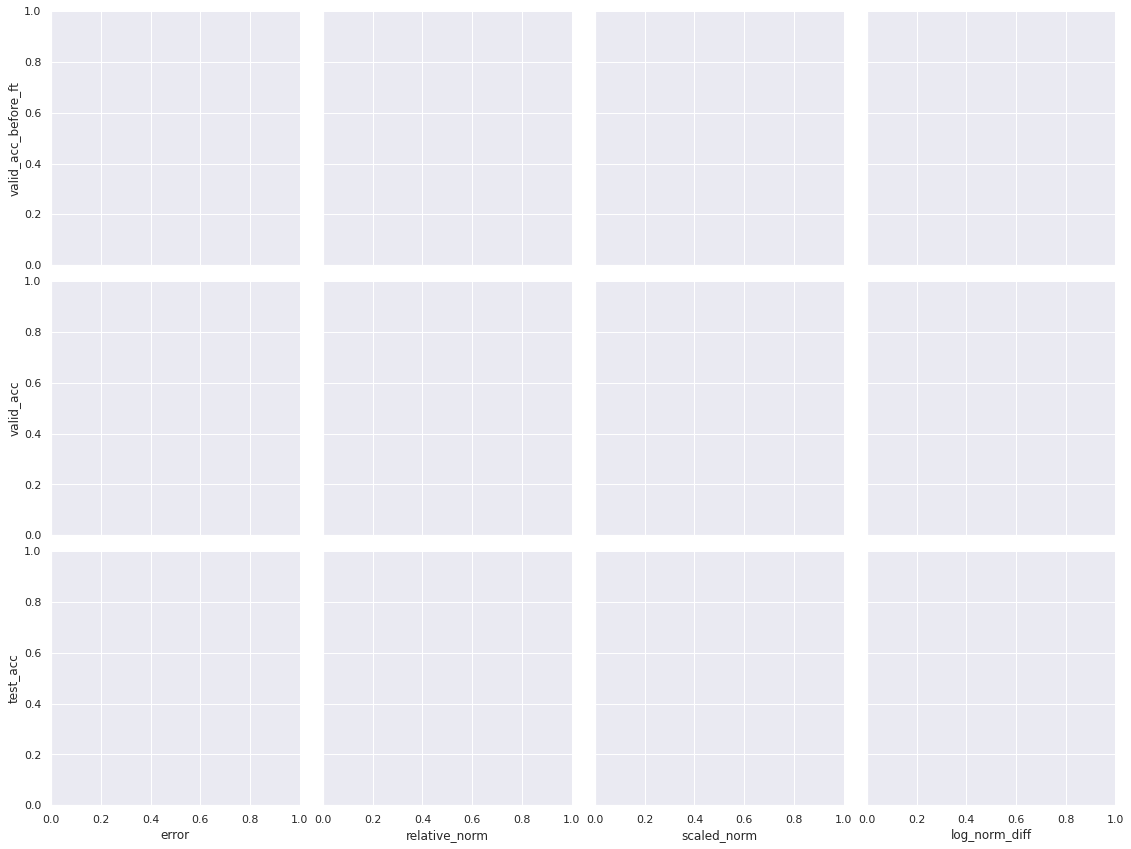

In [37]:
from matplotlib import pyplot as plt 

g = sns.PairGrid(
    df,
    y_vars=["valid_acc_before_ft", "valid_acc","test_acc"], 
    x_vars=["error", "relative_norm", "scaled_norm" ,"log_norm_diff"],
    height=4,
)
g.map(lambda x, y, **kwargs: sns.scatterplot(x=x,y=y,hue=df.layers,style=df.factorization,legend='auto')) # color=".3")
g.set(ylim=(0.86,0.925))
g.add_legend()

lines = {
    0: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    1: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    2: {
        "y":baseline_result['test_acc'],
        "color":'black',
    },
}

for i in range(3):
    for j in range(4):
        gax = g.axes[i][j]
        gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
plt.legend(
    bbox_to_anchor=(1.05, 1,1,1),
    loc='upper left', borderaxespad=0.
    # loc='right',
    # bbox_to_anchor=(1.1, 0.5, 0, 0),
)
# g.fig.get_children()[-1].set_bbox_to_anchor((1.1, 0.5, 0, 0))

# g.savefig("../../plots/cifar10/rn18/scatter_errors_performances_layers_factorizations")

In [38]:
!pwd

/home/jetzeschuurman/gitProjects/phd/tddl/notebooks/results


KeyError: "['error'] not in index"

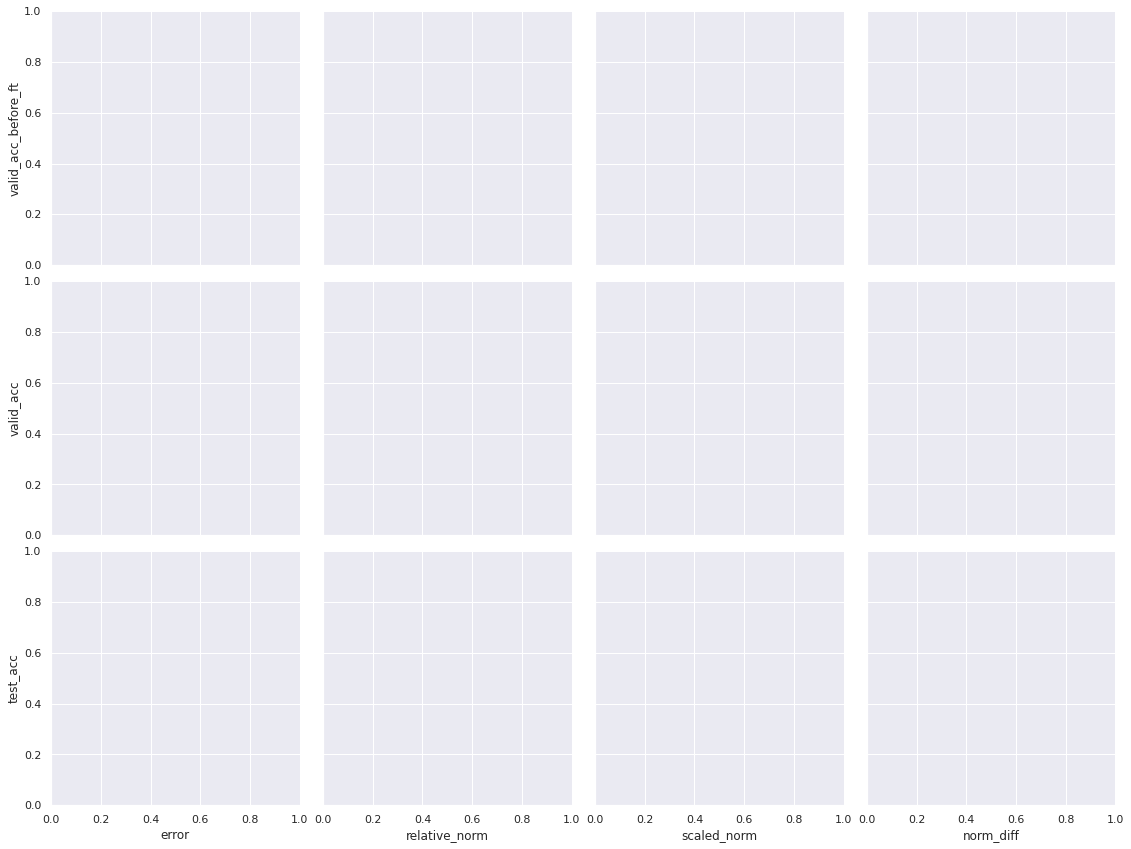

In [39]:
g = sns.PairGrid(
    df,
    y_vars=["valid_acc_before_ft", "valid_acc","test_acc"], 
    x_vars=["error", "relative_norm", "scaled_norm" ,"norm_diff"],
    hue="factorization",
    height=4,
    # style="factorization",
) #, height=4)
g.map(sns.scatterplot) # color=".3")
g.set(ylim=(0.86,0.925))
# g.set(ylim=(-1, 11), yticks=[0, 5, 10])
g.add_legend()

lines = {
    0: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    1: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    2: {
        "y":baseline_result['test_acc'],
        "color":'black',
    },
}

for i in range(3):
    for j in range(4):
        gax = g.axes[i][j]
        gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

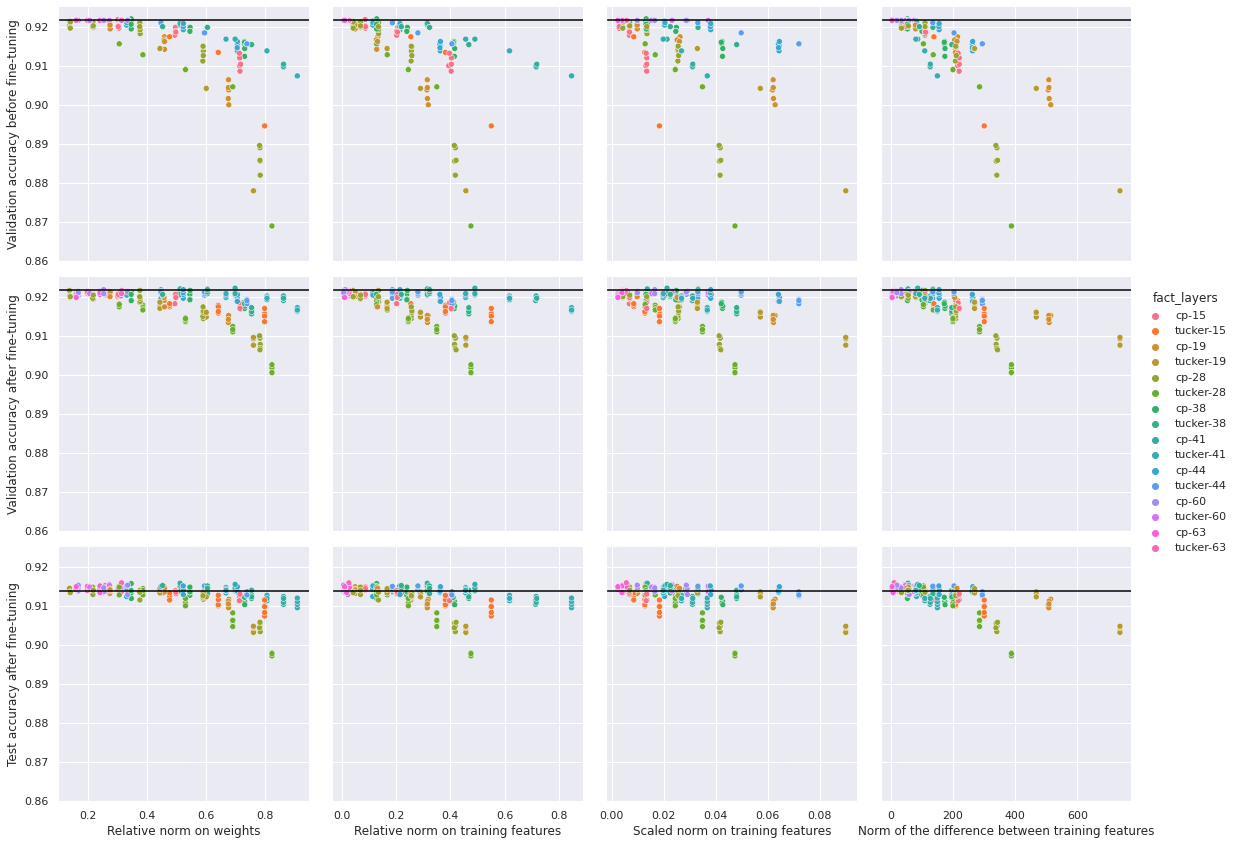

In [89]:
g = sns.PairGrid(
    df,
    y_vars=["valid_acc_before_ft", "valid_acc","test_acc"], 
    x_vars=["error", "relative_norm", "scaled_norm" ,"norm_diff"],
    hue="fact_layers",
    height=4,
    hue_order=[
        'cp-15','tucker-15','cp-19','tucker-19','cp-28','tucker-28','cp-38','tucker-38',
        'cp-41','tucker-41','cp-44','tucker-44','cp-60','tucker-60','cp-63','tucker-63',
    ]
    # palette=['b','orange']
    # style="factorization",
) #, height=4)
g.map(sns.scatterplot) # color=".3")
g.set(ylim=(0.86,0.925))
# g.set(ylim=(-1, 11), yticks=[0, 5, 10])
g.add_legend()

lines = {
    0: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    1: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    2: {
        "y":baseline_result['test_acc'],
        "color":'black',
    },
}

for i in range(3):
    for j in range(4):
        gax = g.axes[i][j]
        gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

In [90]:
df

name  nr     error layers factorization  rank  valid_acc  \
0    conv2  63  0.311843     63            cp  0.10     0.9210   
1    conv1  60  0.337100     60        tucker  0.10     0.9206   
2    conv1  60  0.272814     60        tucker  0.25     0.9210   
3    conv1  28  0.823151     28        tucker  0.10     0.9018   
4    conv1  28  0.305965     28        tucker  0.90     0.9182   
..     ...  ..       ...    ...           ...   ...        ...   
255  conv1  44  0.447319     44        tucker  0.50     0.9212   
256  conv2  63  0.160246     63            cp  0.50     0.9198   
257  conv2  38  0.452808     38        tucker  0.50     0.9206   
258  conv2  15  0.798234     15        tucker  0.10     0.9170   
259  conv1  44  0.738350     44        tucker  0.10     0.9190   

     valid_acc_before_ft  n_param_fact  test_acc  ...   norm_diff  \
0                 0.9216       9050765    0.9143  ...   12.214946   
1                 0.9216       9051469    0.9137  ...   75.989307   
2                 0.9216       9402829    0.9148  ...   47.516211   
3                 0.8690      11041517    0.8974  ...  388.085709   
4                 0.9156      11159148    0.9145  ...  105.363881   
..                   ...           ...       ...  ...         ...   
255               0.9210      10879741    0.9150  ...  135.603151   
256               0.9216       9995161    0.9149  ...    4.885679   
257               0.9200      10879741    0.9152  ...   92.270423   
258               0.8946      11140672    0.9115  ...  300.793008   
259               0.9156      10642581    0.9128  ...  294.612884   

          norm_b      n_b  relative_norm  scaled_norm    fact_rank  \
0     429.339663   2048.0       0.028521     0.005964       cp-0.1   
1    2603.942812   2048.0       0.029340     0.037104   tucker-0.1   
2    2603.942812   2048.0       0.018346     0.023201  tucker-0.25   
3     815.280181   8192.0       0.476089     0.047374   tucker-0.1   
4     815.280181   8192.0       0.129281     0.012862   tucker-0.9   
..           ...      ...            ...          ...          ...   
255   726.060440   4096.0       0.186951     0.033106   tucker-0.5   
256   429.339663   2048.0       0.011455     0.002386       cp-0.5   
257   420.262521   4096.0       0.219677     0.022527   tucker-0.5   
258   545.957711  16384.0       0.550880     0.018359   tucker-0.1   
259   726.060440   4096.0       0.406067     0.071927   tucker-0.1   

     fact_layers layers_fact log_norm_diff log_test_acc  
0          cp-63       63-cp      2.502660    -0.089597  
1      tucker-60   60-tucker      4.330593    -0.090253  
2      tucker-60   60-tucker      3.861071    -0.089050  
3      tucker-28   28-tucker      5.961226    -0.108254  
4      tucker-28   28-tucker      4.657420    -0.089378  
..           ...         ...           ...          ...  
255    tucker-44   44-tucker      4.909733    -0.088831  
256        cp-63       63-cp      1.586308    -0.088941  
257    tucker-38   38-tucker      4.524724    -0.088613  
258    tucker-15   15-tucker      5.706422    -0.092664  
259    tucker-44   44-tucker      5.685662    -0.091238  

[260 rows x 22 columns]

# Kendals tau

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html

In [16]:
def p_to_asterisks(p):
    """
    Estimates are significantly different from zero at 1\% significance level, 
    unless they are indicated with asterisk(s), 5\% (*), or 10\% (**), 
    or not significantly different from zero (***).
    """
    if p < 0.01:
        asterisk = ""
    elif p < 0.05:
        asterisk = "*"
    elif p < 0.1:
        asterisk = "**"
    else:
        asterisk = "***"
    return asterisk

In [17]:
from scipy.stats.mstats_basic import kendalltau
from functools import partial

kendalltau_a = partial(kendalltau, use_ties=False, use_missing=False, method='auto')
# kendalltau(x, y, use_ties=True, use_missing=False, method='auto')

# scipy.stats.kendalltau(x, y, initial_lexsort=None, nan_policy='propagate', method='auto', variant='b', alternative='two-sided')

# TODO: make multilevel columns 
# https://stackoverflow.com/questions/21443963/pandas-multilevel-column-names


metrics=['log_valid_error_before_ft','log_valid_error','log_test_error_before_ft','log_test_error']
errors=['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff','layers']
# errors = ['relative_norm_weight','scaled_norm_weight','diff_norm_weight', 'relative_norm','scaled_norm','norm_diff','layers']
# metrics = ['valid_acc_before_ft','valid_acc','test_acc']

df_kt = pd.DataFrame(index=metrics, columns=errors)

for error in errors:
    for metric in metrics:
        corr, p = kendalltau_a(df[error], df[metric])
        df_kt[error][metric] = "{:.2f}{}".format(corr,p_to_asterisks(p))


In [18]:

# df_kt.to_pickle("./tables/kt_rn18_c10_classification_error.zip")

In [19]:
# from scipy.stats import kendalltau

# scipy.stats.kendalltau(x, y, initial_lexsort=None, nan_policy='propagate', method='auto', variant='b', alternative='two-sided')

# TODO: make multilevel columns 
# https://stackoverflow.com/questions/21443963/pandas-multilevel-column-names

# errors = ['error', 'relative_norm','scaled_norm','norm_diff']
# metrics = ['valid_acc_before_ft','valid_acc','test_acc']

# columns = []
# for error in errors:
#     columns.append(f'{error}_tau')
#     columns.append(f'{error}_p')

# df_kt = pd.DataFrame(index=metrics, columns=errors)

# for error in errors:
#     for metric in metrics:
#         corr, p = kendalltau(df[error], df[metric])
#         df_kt[f'{error}_tau'][metric] = corr
#         df_kt[f'{error}_p'][metric] = p

In [20]:
# df_kt.to_pickle("./tables/kt_rn18_c10.zip")

In [21]:
neat_table_indices = {
    'test_acc_before_ft': "Val. before f.t.",
    'valid_acc_before_ft': "Val. before f.t.",
    'valid_acc': "Val. after f.t.",
    'test_acc': "Test after f.t.",
}
neat_table_columns = {
    'error': "Relative-weights",
    'relative_norm': "Relative-features",
    'scaled_norm': "Scaled-features",
    'norm_diff': "Absolute-features"}
df_kt.rename(index=neat_table_indices,columns=neat_table_columns, inplace=True)
df_kt

relative_norm_weight Relative-features  \
log_valid_error_before_ft                 0.65              0.67   
log_valid_error                           0.47              0.48   
log_test_error_before_ft                  0.42              0.40   
log_test_error                            0.49              0.49   

                          scaled_norm_weight Scaled-features diff_norm_weight  \
log_valid_error_before_ft               0.61            0.48             0.13   
log_valid_error                         0.45            0.34             0.09   
log_test_error_before_ft                0.35            0.30           0.05**   
log_test_error                          0.42            0.33             0.12   

                          Absolute-features layers  
log_valid_error_before_ft              0.68  -0.44  
log_valid_error                        0.54  -0.37  
log_test_error_before_ft               0.42  -0.23  
log_test_error                         0.47  -0.29

In [22]:
print(df_kt.to_latex(
    float_format="{:0.2f}".format, 
    position='htbp', 
    caption="Kendall's tau from ResNet18 on CIFAR10 for different combinations approximation errors and performance measures. The rows correspond to accuracies measured on the validation (Val.) and test set, before and after fine-tuning (f.t.). The norms on the features are based on the training features. The relative, scaled, and absolute norms correspond to Eq. (3), (2), and (1) respectively. All are significantly different from zero at 1\% significance level.",
    label='kt_rn18_c10_errors_performances',
))

\begin{table}[htbp]
\centering
\caption{Kendall's tau from ResNet18 on CIFAR10 for different combinations approximation errors and performance measures. The rows correspond to accuracies measured on the validation (Val.) and test set, before and after fine-tuning (f.t.). The norms on the features are based on the training features. The relative, scaled, and absolute norms correspond to Eq. (3), (2), and (1) respectively. All are significantly different from zero at 1\% significance level.}
\label{kt_rn18_c10_errors_performances}
\begin{tabular}{llllllll}
\toprule
{} & relative\_norm\_weight & Relative-features & scaled\_norm\_weight & Scaled-features & diff\_norm\_weight & Absolute-features & layers \\
\midrule
log\_valid\_error\_before\_ft &                 0.65 &              0.67 &               0.61 &            0.48 &             0.13 &              0.68 &  -0.44 \\
log\_valid\_error           &                 0.47 &              0.48 &               0.45 &            0.34 &     

In [23]:
df.layers.astype(str).unique()

array(['63', '60', '28', '38', '41', '44', '15', '19'], dtype=object)

In [24]:
errors_metrics = []

for error in errors:
    for metric in metrics:
        errors_metrics.append(f'{error}-{metric}')

layers = ['15','19','28','38','41','44','60','63']

df_kt_layers = pd.DataFrame(
    index=errors_metrics,
    columns=layers,
)

for layer in df.layers.unique():
    df_layer = df[df.layers==layer]
    for error in errors:
        for metric in metrics:
            corr, p = kendalltau_a(df_layer[error], df_layer[metric])
            df_kt_layers[str(layer)][f'{error}-{metric}'] = "{:.2f}{}".format(corr,p_to_asterisks(p))
    

In [25]:
neat_table_indices_layers = {
    'error-test_acc_before_ft': "Test before f.t.-weight",
    'error-valid_acc_before_ft': "Val. before f.t.-weight",
    'error-valid_acc': "Val. after f.t.-weight",
    'error-test_acc': "Test after f.t.-weight",

    'relative_norm-valid_acc_before_ft': "Val. before f.t.-rel. feat.",
    'relative_norm-valid_acc': "Val. after f.t.-rel. feat.",
    'relative_norm-test_acc': "Test after f.t.-rel. feat.",

    'scaled_norm-valid_acc_before_ft': "Val. before f.t.-sc. feat",
    'scaled_norm-valid_acc': "Val. after f.t.-sc. feat",
    'scaled_norm-test_acc': "Test after f.t.-sc. feat",

    'norm_diff-valid_acc_before_ft': "Val. before f.t.-diff. feat",
    'norm_diff-valid_acc': "Val. after f.t.-diff. feat",
    'norm_diff-test_acc': "Test after f.t.-diff. feat",
}

df_kt_layers.rename(index=neat_table_indices_layers, inplace=True)
df_kt_layers

15       19       28  \
relative_norm_weight-log_valid_error_before_ft     0.79     0.83     0.78   
relative_norm_weight-log_valid_error               0.71     0.78     0.85   
relative_norm_weight-log_test_error_before_ft      0.72     0.82     0.82   
relative_norm_weight-log_test_error                0.67     0.68     0.83   
relative_norm-log_valid_error_before_ft            0.87     0.87     0.81   
relative_norm-log_valid_error                      0.75     0.82     0.87   
relative_norm-log_test_error_before_ft             0.74     0.83     0.84   
relative_norm-log_test_error                       0.72     0.67     0.83   
scaled_norm_weight-log_valid_error_before_ft       0.79     0.83     0.78   
scaled_norm_weight-log_valid_error                 0.71     0.78     0.85   
scaled_norm_weight-log_test_error_before_ft        0.72     0.82     0.82   
scaled_norm_weight-log_test_error                  0.67     0.68     0.83   
scaled_norm-log_valid_error_before_ft              0.87     0.87     0.81   
scaled_norm-log_valid_error                        0.75     0.82     0.87   
scaled_norm-log_test_error_before_ft               0.74     0.83     0.84   
scaled_norm-log_test_error                         0.72     0.67     0.83   
diff_norm_weight-log_valid_error_before_ft         0.79     0.83     0.78   
diff_norm_weight-log_valid_error                   0.71     0.78     0.85   
diff_norm_weight-log_test_error_before_ft          0.72     0.82     0.82   
diff_norm_weight-log_test_error                    0.67     0.68     0.83   
norm_diff-log_valid_error_before_ft                0.87     0.87     0.81   
norm_diff-log_valid_error                          0.75     0.82     0.87   
norm_diff-log_test_error_before_ft                 0.74     0.83     0.84   
norm_diff-log_test_error                           0.72     0.67     0.83   
layers-log_valid_error_before_ft                0.00***  0.00***  0.00***   
layers-log_valid_error                          0.00***  0.00***  0.00***   
layers-log_test_error_before_ft                 0.00***  0.00***  0.00***   
layers-log_test_error                           0.00***  0.00***  0.00***   

                                                     38       41       44  \
relative_norm_weight-log_valid_error_before_ft     0.77     0.86     0.81   
relative_norm_weight-log_valid_error               0.51     0.60     0.51   
relative_norm_weight-log_test_error_before_ft      0.55     0.75   0.16**   
relative_norm_weight-log_test_error                0.54     0.66     0.36   
relative_norm-log_valid_error_before_ft            0.74     0.86     0.84   
relative_norm-log_valid_error                      0.51     0.60     0.51   
relative_norm-log_test_error_before_ft             0.53     0.75    0.18*   
relative_norm-log_test_error                       0.51     0.66     0.33   
scaled_norm_weight-log_valid_error_before_ft       0.77     0.86     0.81   
scaled_norm_weight-log_valid_error                 0.51     0.60     0.51   
scaled_norm_weight-log_test_error_before_ft        0.55     0.75   0.16**   
scaled_norm_weight-log_test_error                  0.54     0.66     0.35   
scaled_norm-log_valid_error_before_ft              0.74     0.86     0.84   
scaled_norm-log_valid_error                        0.51     0.60     0.51   
scaled_norm-log_test_error_before_ft               0.53     0.75    0.18*   
scaled_norm-log_test_error                         0.51     0.66     0.33   
diff_norm_weight-log_valid_error_before_ft         0.77     0.86     0.81   
diff_norm_weight-log_valid_error                   0.51     0.60     0.51   
diff_norm_weight-log_test_error_before_ft          0.55     0.75   0.16**   
diff_norm_weight-log_test_error                    0.54     0.66     0.35   
norm_diff-log_valid_error_before_ft                0.74     0.86     0.84   
norm_diff-log_valid_error                          0.51     0.60     0.51   
norm_diff-log_test_error_before_ft              

In [26]:
print(df_kt_layers.to_latex(
    position='htbp', 
    caption="Kendall's tau from ResNet18 on CIFAR10 conditioned on the layer for different combinations approximation errors and performance measures. The rows correspond to combinations of accuracies (measured on the validation (Val.) and test set, before and after fine-tuning (f.t.)) and approximation errors (relative, scaled, and absolute norms correspond to Eq. (3), (2), and (1) respectively). The norms on the features are based on the training features. Estimates are significantly different from zero at 1\% significance level, unless they are indicated with asterisk(s), 5\% (*), or 10\% (**), or not significantly different from zero (***).",
    label='kt_rn18_c10_errors_performances_layers',
))

\begin{table}[htbp]
\centering
\caption{Kendall's tau from ResNet18 on CIFAR10 conditioned on the layer for different combinations approximation errors and performance measures. The rows correspond to combinations of accuracies (measured on the validation (Val.) and test set, before and after fine-tuning (f.t.)) and approximation errors (relative, scaled, and absolute norms correspond to Eq. (3), (2), and (1) respectively). The norms on the features are based on the training features. Estimates are significantly different from zero at 1\% significance level, unless they are indicated with asterisk(s), 5\% (*), or 10\% (**), or not significantly different from zero (***).}
\label{kt_rn18_c10_errors_performances_layers}
\begin{tabular}{lllllllll}
\toprule
{} &       15 &       19 &       28 &       38 &       41 &       44 &       60 &        63 \\
\midrule
relative\_norm\_weight-log\_valid\_error\_before\_ft &     0.79 &     0.83 &     0.78 &     0.77 &     0.86 &     0.81 &  0.00*** & 

In [27]:
df.factorization.unique()

array(['cp', 'tucker', 'tt'], dtype=object)

In [28]:
factorizations = ['cp', 'tucker', 'tt']

df_kt_factorizations = pd.DataFrame(
    index=errors_metrics,
    columns=factorizations,
)

for fact in df.factorization.unique():
    df_ = df[df.factorization==fact]
    for error in errors:
        for metric in metrics:
            corr, p = kendalltau_a(df_[error], df_[metric])
            df_kt_factorizations[str(fact)][f'{error}-{metric}'] = "{:.2f}{}".format(corr,p_to_asterisks(p))

df_kt_factorizations.rename(index=neat_table_indices_layers, inplace=True)

print(df_kt_factorizations.to_latex(
    position='htbp', 
    caption="Kendall's tau from ResNet18 on CIFAR10 conditioned on the factorization for different combinations approximation errors and performance measures. The rows correspond to combinations of accuracies (measured on the validation (Val.) and test set, before and after fine-tuning (f.t.)) and approximation errors (relative, scaled, and absolute norms correspond to Eq. (3), (2), and (1) respectively). The norms on the features are based on the training features. Estimates are significantly different from zero at 1\% significance level, unless they are indicated with asterisk(s), 5\% (*), or 10\% (**), or not significantly different from zero (***).",
    label='kt_rn18_c10_errors_performances_factorization',
))
    

\begin{table}[htbp]
\centering
\caption{Kendall's tau from ResNet18 on CIFAR10 conditioned on the factorization for different combinations approximation errors and performance measures. The rows correspond to combinations of accuracies (measured on the validation (Val.) and test set, before and after fine-tuning (f.t.)) and approximation errors (relative, scaled, and absolute norms correspond to Eq. (3), (2), and (1) respectively). The norms on the features are based on the training features. Estimates are significantly different from zero at 1\% significance level, unless they are indicated with asterisk(s), 5\% (*), or 10\% (**), or not significantly different from zero (***).}
\label{kt_rn18_c10_errors_performances_factorization}
\begin{tabular}{llll}
\toprule
{} &       cp &    tucker &       tt \\
\midrule
relative\_norm\_weight-log\_valid\_error\_before\_ft &     0.61 &      0.62 &     0.68 \\
relative\_norm\_weight-log\_valid\_error           &     0.37 &      0.47 &     0.54 \\

## Mean and std

In [29]:
metrics=['log_valid_error_before_ft','log_valid_error','log_test_error_before_ft','log_test_error']
errors=['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff']

In [30]:
from tddl.post_processing.kendalls_tau import split_into_run, calculate_kendalls_tau_per_run, mean_std_over_runs

dfs = split_into_run(df, 5)
df_kts = calculate_kendalls_tau_per_run(dfs, errors=errors, metrics=metrics)
df_kt_mean_std = mean_std_over_runs(df_kts, errors=errors, metrics=metrics)
df_kt_mean_std

relative_norm_weight relative_norm  \
log_valid_error_before_ft            0.66±0.01     0.68±0.01   
log_valid_error                      0.47±0.03     0.48±0.03   
log_test_error_before_ft             0.42±0.02     0.40±0.01   
log_test_error                       0.50±0.02     0.49±0.02   

                          scaled_norm_weight scaled_norm diff_norm_weight  \
log_valid_error_before_ft          0.62±0.02   0.48±0.01        0.13±0.02   
log_valid_error                    0.45±0.02   0.35±0.03        0.09±0.01   
log_test_error_before_ft           0.35±0.01   0.30±0.01        0.05±0.02   
log_test_error                     0.43±0.02   0.33±0.03        0.11±0.03   

                           norm_diff  
log_valid_error_before_ft  0.69±0.00  
log_valid_error            0.54±0.03  
log_test_error_before_ft   0.42±0.01  
log_test_error             0.47±0.01

In [31]:
from tddl.post_processing.kendalls_tau import mean_over_runs

meh = pd.DataFrame(mean_over_runs(df_kts), index=metrics, columns=errors)

neat_table_indices = {
    'log_test_error_before_ft': "T B",
    'log_valid_error_before_ft': "V B",
    'log_valid_error': "V A",
    'log_test_error': "T A",
}
neat_table_columns = {				
    "relative_norm_weight": "RW",
    "scaled_norm_weight": "SW",
    "diff_norm_weight": "DW",
    "relative_norm": "RF",
    "scaled_norm": "SF",
    "norm_diff": "DF",
    "layers": "L"
}

meh.rename(index=neat_table_indices ,columns=neat_table_columns, inplace=True)
kt = meh.round(decimals=2)

print(kt.to_latex(
    position='htbp', 
    caption="Kendall's tau from ResNet18 on CIFAR10. Kendall's tau is calculated per run, then averaged over all runs.",
    label='kt_rn18_c10_errors_performances_layers',
))


\begin{table}[htbp]
\centering
\caption{Kendall's tau from ResNet18 on CIFAR10. Kendall's tau is calculated per run, then averaged over all runs.}
\label{kt_rn18_c10_errors_performances_layers}
\begin{tabular}{lrrrrrr}
\toprule
{} &    RW &    RF &    SW &    SF &    DW &    DF \\
\midrule
V B &  0.66 &  0.68 &  0.62 &  0.48 &  0.13 &  0.69 \\
V A &  0.47 &  0.48 &  0.45 &  0.35 &  0.09 &  0.54 \\
T B &  0.42 &  0.40 &  0.35 &  0.30 &  0.05 &  0.42 \\
T A &  0.50 &  0.49 &  0.43 &  0.33 &  0.11 &  0.47 \\
\bottomrule
\end{tabular}
\end{table}



In [32]:
from tddl.post_processing.kendalls_tau import dfs_for_bar

df_bar = dfs_for_bar(
    df_kts, 
    dataset='CIFAR-10', 
    model='ResNet-18', 
    errors=errors, 
    metrics=metrics,
)
# df_bar.to_pickle("./tables/kta_rn18_c10_bar_log_error.zip")

In [33]:
df_bar

kt                   acc_type           approx_type   dataset  \
0   0.664469  log_valid_error_before_ft  relative_norm_weight  CIFAR-10   
1   0.426007            log_valid_error  relative_norm_weight  CIFAR-10   
2   0.387729   log_test_error_before_ft  relative_norm_weight  CIFAR-10   
3   0.466850             log_test_error  relative_norm_weight  CIFAR-10   
4   0.687546  log_valid_error_before_ft         relative_norm  CIFAR-10   
..       ...                        ...                   ...       ...   
19  0.117438             log_test_error      diff_norm_weight  CIFAR-10   
20  0.685586  log_valid_error_before_ft             norm_diff  CIFAR-10   
21  0.537901            log_valid_error             norm_diff  CIFAR-10   
22  0.419903   log_test_error_before_ft             norm_diff  CIFAR-10   
23  0.481329             log_test_error             norm_diff  CIFAR-10   

        model  
0   ResNet-18  
1   ResNet-18  
2   ResNet-18  
3   ResNet-18  
4   ResNet-18  
..        ...  
19  ResNet-18  
20  ResNet-18  
21  ResNet-18  
22  ResNet-18  
23  ResNet-18  

[120 rows x 5 columns]

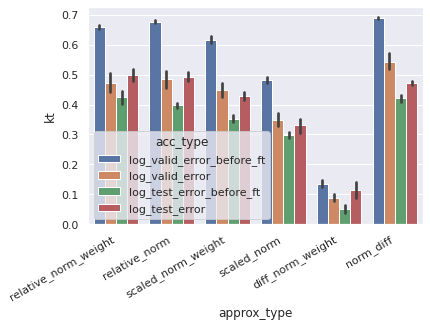

In [34]:
# sns.set_theme(style="whitegrid")

ax = sns.barplot(
    x='approx_type',
    y='kt',
    hue='acc_type',
    data=df_bar,
    # ci="sd", palette="dark", alpha=.6, height=6,
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, fontdict={'horizontalalignment':'right'})# 'center', 'left', 'right')

# g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")

fig = ax.get_figure()
# fig.savefig("../../plots/cifar10/rn18/bar_approx_perform")


In [35]:
# df_kt_mean_std.to_pickle("./tables/kt_rn18_c10_mean_std.zip")

## Kendalls tau per layer

In [36]:
df['layers'].unique()

[63, 60, 28, 38, 41, 44, 15, 19]
Categories (8, int64): [63, 60, 28, 38, 41, 44, 15, 19]

In [37]:
# from scipy.stats import kendalltau
dfs = split_into_run(df, 5)
# n = 0
# layer = 63
model = 'ResNet-18'
dataset = 'CIFAR-10'
performs = ['log_valid_error_before_ft','log_valid_error','log_test_error_before_ft','log_test_error']
approxs = ['relative_norm_weight','relative_norm'] # ['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff']
layers = [15,19,28,38,41,44,60,63]
N = 5

df_layers_ = pd.DataFrame(columns=['kt','layer', 'run', 'performance_metric', 'approximation_error','model','dataset'])
df_means = pd.DataFrame(columns=approxs, index=performs)
df_mean_layers = pd.DataFrame(columns=['kt','run', 'performance_metric', 'approximation_error','model','dataset'])

array = np.zeros((len(performs),len(approxs),len(layers),N))

for p, perform in enumerate(performs):
    print(perform)
    for a, approx in enumerate(approxs):
        print(approx)
        arr = np.zeros((len(layers),N))
        for n in range(N):
            cs = np.zeros(len(layers))
            df_n = dfs[n]
            c_all, _ = kendalltau_a(df_n[perform],df_n[approx])
            for l, layer in enumerate(layers):
                df_n_l = df_n.loc[df_n.layers == layer]
                # print(df_n_l)
                c, _ = kendalltau_a(df_n_l[perform],df_n_l[approx])
                print(f"Layer: {layer}, run: {n}, Kendall's tau {c}")
                df_layers_ = df_layers_.append({
                    'layer':layer,
                    'run':n,
                    'performance_metric':perform,
                    'approximation_error':approx,
                    'kt': c,
                    'kt_diff':c-c_all,
                    'model': model,
                    'dataset': dataset,
                }, ignore_index=True)
                array[p, a, l, n] = c
                arr[l,n] = c 
                cs[l] = c
            df_mean_layers = df_mean_layers.append({
                'run':n,
                'performance_metric':perform,
                'approximation_error':approx,
                'kt': cs.mean(),
                'kt_mean': cs.mean(),
                'kt_std': cs.std(),
                'model': model,
                'dataset': dataset,
            }, ignore_index=True)
        df_means[approx][perform] = arr.mean()

# df_layers_.to_pickle("./tables/kta_rn18_c10_bar_log_error_layers.zip")
# df_mean_layers.to_pickle("./tables/kta_rn18_c10_bar_log_error_layers_mean.zip")

log_valid_error_before_ft
relative_norm_weight
Layer: 15, run: 0, Kendall's tau 0.8333333333333334
Layer: 19, run: 0, Kendall's tau 0.8461538461538461
Layer: 28, run: 0, Kendall's tau 0.8333333333333334
Layer: 38, run: 0, Kendall's tau 0.7948717948717948
Layer: 41, run: 0, Kendall's tau 0.9230769230769231
Layer: 44, run: 0, Kendall's tau 0.8974358974358975
Layer: 60, run: 0, Kendall's tau 0.0
Layer: 63, run: 0, Kendall's tau 0.0
Layer: 15, run: 1, Kendall's tau 0.8205128205128205
Layer: 19, run: 1, Kendall's tau 0.8974358974358975
Layer: 28, run: 1, Kendall's tau 0.8333333333333334
Layer: 38, run: 1, Kendall's tau 0.7692307692307693
Layer: 41, run: 1, Kendall's tau 0.9102564102564102
Layer: 44, run: 1, Kendall's tau 0.8205128205128205
Layer: 60, run: 1, Kendall's tau 0.0
Layer: 63, run: 1, Kendall's tau 0.0
Layer: 15, run: 2, Kendall's tau 0.8461538461538461
Layer: 19, run: 2, Kendall's tau 0.8974358974358975
Layer: 28, run: 2, Kendall's tau 0.8333333333333334
Layer: 38, run: 2, Kendal

In [38]:
df_layers_.head()

kt layer run         performance_metric   approximation_error  \
0  0.833333    15   0  log_valid_error_before_ft  relative_norm_weight   
1  0.846154    19   0  log_valid_error_before_ft  relative_norm_weight   
2  0.833333    28   0  log_valid_error_before_ft  relative_norm_weight   
3  0.794872    38   0  log_valid_error_before_ft  relative_norm_weight   
4  0.923077    41   0  log_valid_error_before_ft  relative_norm_weight   

       model   dataset   kt_diff  
0  ResNet-18  CIFAR-10  0.181136  
1  ResNet-18  CIFAR-10  0.193956  
2  ResNet-18  CIFAR-10  0.181136  
3  ResNet-18  CIFAR-10  0.142674  
4  ResNet-18  CIFAR-10  0.270879

In [39]:
# from scipy.stats import kendalltau
dfs = split_into_run(df, 5)
# n = 0
# layer = 63
model = 'ResNet-18'
dataset = 'CIFAR-10'
performs = ['log_valid_error_before_ft','log_valid_error','log_test_error_before_ft','log_test_error']
approxs = ['relative_norm_weight','relative_norm'] # ['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff']
factorizations = ['cp','tucker','tt']
N = 5

df_factorizations_ = pd.DataFrame(columns=['kt','factorization', 'run', 'performance_metric', 'approximation_error','model','dataset'])
df_means = pd.DataFrame(columns=approxs, index=performs)
df_mean_factorizations = pd.DataFrame(columns=['kt','run', 'performance_metric', 'approximation_error','model','dataset'])

array = np.zeros((len(performs),len(approxs),len(factorizations),N))

for p, perform in enumerate(performs):
    print(perform)
    for a, approx in enumerate(approxs):
        print(approx)
        arr = np.zeros((len(factorizations),N))
        for n in range(N):
            cs = np.zeros(len(factorizations))
            df_n = dfs[n]
            c_all, _ = kendalltau_a(df_n[perform],df_n[approx])
            for l, factorization in enumerate(factorizations):
                df_n_l = df_n.loc[df_n.factorization == factorization]
                # print(df_n_l)
                c, _ = kendalltau_a(df_n_l[perform],df_n_l[approx])
                print(f"factorization: {factorization}, run: {n}, Kendall's tau {c}")
                df_factorizations_ = df_factorizations_.append({
                    'factorization':factorization,
                    'run':n,
                    'performance_metric':perform,
                    'approximation_error':approx,
                    'kt': c,
                    'kt_diff':c-c_all,
                    'model': model,
                    'dataset': dataset,
                }, ignore_index=True)
                array[p, a, l, n] = c
                arr[l,n] = c 
                cs[l] = c
            df_mean_factorizations = df_mean_factorizations.append({
                'run':n,
                'performance_metric':perform,
                'approximation_error':approx,
                'kt': cs.mean(),
                'kt_mean': cs.mean(),
                'kt_std': cs.std(),
                'model': model,
                'dataset': dataset,
            }, ignore_index=True)
        df_means[approx][perform] = arr.mean()

# df_factorizations_.to_pickle("./tables/kta_rn18_c10_bar_log_error_factorizations.zip")
# df_mean_factorizations.to_pickle("./tables/kta_rn18_c10_bar_log_error_factorizations_mean.zip")

log_valid_error_before_ft
relative_norm_weight
factorization: cp, run: 0, Kendall's tau 0.6363636363636364
factorization: tucker, run: 0, Kendall's tau 0.6310483870967742
factorization: tt, run: 0, Kendall's tau 0.691025641025641
factorization: cp, run: 1, Kendall's tau 0.592741935483871
factorization: tucker, run: 1, Kendall's tau 0.6310483870967742
factorization: tt, run: 1, Kendall's tau 0.691025641025641
factorization: cp, run: 2, Kendall's tau 0.5786290322580645
factorization: tucker, run: 2, Kendall's tau 0.6310483870967742
factorization: tt, run: 2, Kendall's tau 0.691025641025641
factorization: cp, run: 3, Kendall's tau 0.6673387096774194
factorization: tucker, run: 3, Kendall's tau 0.6310483870967742
factorization: tt, run: 3, Kendall's tau 0.691025641025641
factorization: cp, run: 4, Kendall's tau 0.6471774193548387
factorization: tucker, run: 4, Kendall's tau 0.6310483870967742
factorization: tt, run: 4, Kendall's tau 0.691025641025641
relative_norm
factorization: cp, run: 0

In [40]:
df_factorizations_.head()

kt factorization run         performance_metric  \
0  0.636364            cp   0  log_valid_error_before_ft   
1  0.631048        tucker   0  log_valid_error_before_ft   
2  0.691026            tt   0  log_valid_error_before_ft   
3  0.592742            cp   1  log_valid_error_before_ft   
4  0.631048        tucker   1  log_valid_error_before_ft   

    approximation_error      model   dataset   kt_diff  
0  relative_norm_weight  ResNet-18  CIFAR-10 -0.021695  
1  relative_norm_weight  ResNet-18  CIFAR-10 -0.027010  
2  relative_norm_weight  ResNet-18  CIFAR-10  0.032967  
3  relative_norm_weight  ResNet-18  CIFAR-10 -0.055503  
4  relative_norm_weight  ResNet-18  CIFAR-10 -0.017197

In [41]:
std_over_layers_runs = array.std(axis=(-1,-2))
std_over_layers_runs

array([[0.03564459, 0.04804944],
       [0.08119854, 0.07091179],
       [0.15237332, 0.15646064],
       [0.12159124, 0.13204127]])

In [42]:
mean_over_runs_std_over_layers = array.mean(axis=-1).std(axis=-1)
print(mean_over_runs_std_over_layers) 


[[0.02995015 0.04363051]
 [0.06790135 0.05985436]
 [0.14597963 0.15265984]
 [0.11471679 0.1234703 ]]


In [43]:
mean_over_layers_std_over_runs = array.mean(axis=-2).std(axis=-1)
print(mean_over_layers_std_over_runs) 

[[0.01115833 0.01162077]
 [0.01689503 0.02165623]
 [0.02521624 0.01978979]
 [0.01997443 0.01356715]]


In [44]:
array.mean(axis=(-1,-2))

array([[0.64884139, 0.65937602],
       [0.4670504 , 0.46954571],
       [0.38014262, 0.36104908],
       [0.48231878, 0.470704  ]])

In [45]:
array.mean(axis=-1).mean(axis=-1)

array([[0.64884139, 0.65937602],
       [0.4670504 , 0.46954571],
       [0.38014262, 0.36104908],
       [0.48231878, 0.470704  ]])

In [46]:
perform = 'valid_error_before_ft'
approx = 'relative_norm_weight' # ['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff']

In [47]:
df_n_l[perform]

365    0.1686
615    0.1116
389    0.0854
144    0.0802
498    0.0790
570    0.1560
368    0.1004
462    0.0864
410    0.0818
551    0.0804
467    0.4348
616    0.1300
376    0.0890
445    0.0838
417    0.0838
356    0.2846
602    0.0880
279    0.0834
352    0.0810
35     0.0796
174    0.0980
330    0.0980
104    0.0968
469    0.0828
463    0.0816
343    0.1344
477    0.0856
246    0.0804
386    0.0790
574    0.0788
208    0.0784
321    0.0784
516    0.0784
39     0.0784
565    0.0784
296    0.0784
564    0.0784
114    0.0784
252    0.0784
87     0.0784
Name: valid_error_before_ft, dtype: float64

In [48]:
df_n_l[approx]

365    0.904281
615    0.785133
389    0.597638
144    0.391674
498    0.313310
570    0.878795
368    0.697391
462    0.538278
410    0.380051
551    0.296318
467    0.956844
616    0.820082
376    0.643662
445    0.459486
417    0.373532
356    0.961171
602    0.757140
279    0.570406
352    0.404784
35     0.328759
174    0.977503
330    0.977503
104    0.959029
469    0.709444
463    0.601941
343    0.951841
477    0.734045
246    0.553463
386    0.390840
574    0.316696
208    0.575679
321    0.334154
516    0.256149
39     0.187764
565    0.152464
296    0.539368
564    0.313173
114    0.244584
252    0.181188
87     0.147862
Name: relative_norm_weight, dtype: float64

In [49]:
array

array([[[[0.63636364, 0.59274194, 0.57862903, 0.66733871, 0.64717742],
         [0.63104839, 0.63104839, 0.63104839, 0.63104839, 0.63104839],
         [0.69102564, 0.69102564, 0.69102564, 0.69102564, 0.69102564]],

        [[0.67424242, 0.65322581, 0.58266129, 0.66733871, 0.67540323],
         [0.6108871 , 0.6108871 , 0.6108871 , 0.6108871 , 0.6108871 ],
         [0.71666667, 0.71666667, 0.71666667, 0.71666667, 0.71666667]]],


       [[[0.38257576, 0.32258065, 0.34677419, 0.49798387, 0.35282258],
         [0.46370968, 0.54637097, 0.47379032, 0.41935484, 0.46774194],
         [0.56794872, 0.55897436, 0.54358974, 0.55512821, 0.50641026]],

        [[0.4469697 , 0.39112903, 0.35483871, 0.47782258, 0.39314516],
         [0.41935484, 0.52620968, 0.42943548, 0.40322581, 0.43951613],
         [0.55128205, 0.58076923, 0.53974359, 0.57435897, 0.51538462]]],


       [[[0.23863636, 0.0625    , 0.18145161, 0.28427419, 0.22782258],
         [0.38508065, 0.38508065, 0.38508065, 0.38508065, 0.38508

In [50]:
array_masked = np.ma.array(array, mask=np.isnan(array))

In [51]:
array_masked_mean = array_masked.mean(axis=(2,3))

In [52]:
pd.DataFrame(data=array_masked_mean, columns=approxs, index=performs)

relative_norm_weight  relative_norm
log_valid_error_before_ft              0.648841       0.659376
log_valid_error                        0.467050       0.469546
log_test_error_before_ft               0.380143       0.361049
log_test_error                         0.482319       0.470704

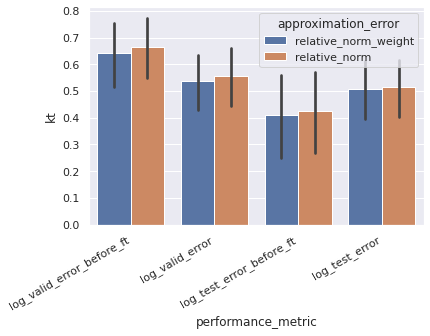

In [53]:
ax = sns.barplot(
    x='performance_metric',
    y='kt',
    hue='approximation_error',
    data=df_layers_,
    # ci="sd", palette="dark", alpha=.6, height=6,
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, fontdict={'horizontalalignment':'right'})# 'center', 'left', 'right')
fig = ax.get_figure()

In [54]:
df_layers_.groupby(['approximation_error','performance_metric',]).mean()

kt   kt_diff
approximation_error  performance_metric                           
relative_norm        log_test_error             0.513416  0.021779
                     log_test_error_before_ft   0.424542  0.026523
                     log_valid_error            0.554762  0.067974
                     log_valid_error_before_ft  0.664103 -0.011711
relative_norm_weight log_test_error             0.508608  0.009619
                     log_test_error_before_ft   0.409890 -0.014896
                     log_valid_error            0.536310  0.063599
                     log_valid_error_before_ft  0.642949 -0.016169

In [55]:
from tddl.post_processing.kendalls_tau import split_into_layers, mean_over_runs, df_for_bar

metrics=['log_valid_error_before_ft','log_valid_error','log_test_error']
errors=['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff']

dfs_layers = split_into_layers(df, 'nr')

df_kts_layers = calculate_kendalls_tau_per_run(dfs_layers, errors=errors, metrics=metrics)
# df_kts_layers_bar = df_for_bar(
#     df_kts_layers,     
#     dataset='CIFAR-10', 
#     model='ResNet-18', 
#     errors=errors, 
#     metrics=metrics,
# )
# df_kts_layers_bar.to_pickle("./tables/kt_rn18_c10_bar_error_layers.zip")

df_kt_layers_mean = pd.DataFrame(mean_over_runs(df_kts), index=metrics, columns=errors)

# dfs = split_into_run(df, 5)
# df_kts = calculate_kendalls_tau_per_run(dfs, errors=errors, metrics=metrics)
# df_kt_mean_std = mean_std_over_runs(df_kts, errors=errors, metrics=metrics)
# df_kt_mean_std

ValueError: Shape of passed values is (4, 6), indices imply (3, 6)

In [56]:
dfs_layers[0]
dfs_0 = split_into_run(dfs_layers[0], 5)
dfl_kts_0 = calculate_kendalls_tau_per_run(dfs, errors=errors, metrics=metrics)
df_kt_layers_means_0 = pd.DataFrame(mean_over_runs(dfl_kts_0), index=metrics, columns=errors)
df_kt_layer_mean_0 = pd.DataFrame(mean_over_runs([df_kt_layers_means_0]), index=metrics, columns=errors)

In [57]:
df_kt_layers_means_0

relative_norm_weight  relative_norm  \
log_valid_error_before_ft              0.658871       0.675503   
log_valid_error                        0.471518       0.481163   
log_test_error                         0.497088       0.491641   

                           scaled_norm_weight  scaled_norm  diff_norm_weight  \
log_valid_error_before_ft            0.617185     0.481002          0.133881   
log_valid_error                      0.446083     0.345454          0.088326   
log_test_error                       0.427092     0.331239          0.118791   

                           norm_diff  
log_valid_error_before_ft   0.687368  
log_valid_error             0.541992  
log_test_error              0.471077

In [58]:
dfs[0]

name  nr  relative_norm_weight  scaled_norm_weight  diff_norm_weight  \
430  conv2  15              0.714103            0.000709         26.129057   
539  conv2  15              0.497708            0.000494         18.211176   
17   conv2  15              0.304725            0.000302         11.149886   
353  conv2  15              0.121650            0.000121          4.451193   
358  conv2  15              0.904281            0.000898         33.087673   
..     ...  ..                   ...                 ...               ...   
129  conv2  63              0.147862            0.000011         25.976234   
264  conv2  63              0.313901            0.000023         55.145676   
363  conv2  63              0.258644            0.000019         45.438248   
215  conv2  63              0.198279            0.000015         34.833344   
117  conv2  63              0.115546            0.000009         20.298935   

    layers factorization   rank  valid_acc  valid_acc_before_ft  ...  \
430     15            cp   0.10     0.9172               0.9120  ...   
539     15            cp   0.25     0.9198               0.9186  ...   
17      15            cp   0.50     0.9206               0.9198  ...   
353     15            cp   0.90     0.9202               0.9218  ...   
358     15            tt   0.16     0.9078               0.8314  ...   
..     ...           ...    ...        ...                  ...  ...   
129     63            tt  80.00     0.9212               0.9216  ...   
264     63        tucker   0.10     0.9214               0.9216  ...   
363     63        tucker   0.25     0.9214               0.9216  ...   
215     63        tucker   0.50     0.9212               0.9216  ...   
117     63        tucker   0.90     0.9212               0.9216  ...   

     test_error  valid_error_before_ft  valid_error  log_test_error_before_ft  \
430      0.0867                 0.0880       0.0828                 -2.369794   
539      0.0865                 0.0814       0.0802                 -2.445301   
17       0.0860                 0.0802       0.0794                 -2.449926   
353      0.0858                 0.0782       0.0798                 -2.453408   
358      0.0962                 0.1686       0.0922                 -1.794563   
..          ...                    ...          ...                       ...   
129      0.0854                 0.0784       0.0788                 -2.449926   
264      0.0863                 0.0784       0.0786                 -2.451085   
363      0.0863                 0.0784       0.0786                 -2.449926   
215      0.0861                 0.0784       0.0788                 -2.449926   
117      0.0855                 0.0784       0.0788                 -2.449926   

    log_test_error  log_valid_error_before_ft  log_valid_error    fact_rank  \
430      -2.445301                  -2.430418        -2.491327       cp-0.1   
539      -2.447611                  -2.508380        -2.523232      cp-0.25   
17       -2.453408                  -2.523232        -2.533257       cp-0.5   
353      -2.455736                  -2.548486        -2.528232       cp-0.9   
358      -2.341326                  -1.780226        -2.383795      tt-0.16   
..             ...                        ...              ...          ...   
129      -2.460409                  -2.545931        -2.540842      tt-80.0   
264      -2.449926                  -2.545931        -2.543384   tucker-0.1   
363      -2.449926                  -2.545931        -2.543384  tucker-0.25   
215      -2.452246                  -2.545931        -2.540842   tucker-0.5   
117      -2.459239                  -2.545931        -2.540842   tucker-0.9   

     fact_layers  layers_fact  
430        cp-15        15-cp  
539        cp-15        15-cp  
17         cp-15        15-cp  
353        cp-15        15-cp  
358        tt-15        15-tt  
..           ...          ...  
129        tt-63        63-tt  
264    tucker-63    63-tuc

In [60]:
print(df_kts[0])

[[0.6644689  0.6875458  0.63443226 0.48168498 0.13589744 0.6908425 ]
 [0.42600733 0.43644688 0.41062272 0.31666666 0.07326008 0.50860804]
 [0.38772893 0.38516483 0.3514652  0.28003663 0.03058608 0.40238094]
 [0.4668498  0.4860806  0.4474359  0.2893773  0.07051282 0.46300367]]


In [61]:
dfs_layers[0].head()

name  nr  relative_norm_weight  scaled_norm_weight  diff_norm_weight  \
0   conv2  63              0.311843            0.000023         54.784103   
6   conv2  63              0.198279            0.000015         34.833344   
16  conv2  63              0.539368            0.000040         94.755577   
48  conv2  63              0.244584            0.000018         42.968273   
51  conv2  63              0.181188            0.000013         31.830917   

   layers factorization   rank  valid_acc  valid_acc_before_ft  ...  \
0      63            cp   0.10     0.9210               0.9216  ...   
6      63        tucker   0.50     0.9210               0.9216  ...   
16     63            tt   0.19     0.9208               0.9216  ...   
48     63            tt  17.90     0.9216               0.9216  ...   
51     63            tt  50.00     0.9214               0.9216  ...   

    test_error  valid_error_before_ft  valid_error  log_test_error_before_ft  \
0       0.0857                 0.0784       0.0790                 -2.451085   
6       0.0855                 0.0784       0.0790                 -2.449926   
16      0.0850                 0.0784       0.0792                 -2.449926   
48      0.0850                 0.0784       0.0784                 -2.449926   
51      0.0854                 0.0784       0.0786                 -2.449926   

   log_test_error  log_valid_error_before_ft  log_valid_error   fact_rank  \
0       -2.456902                  -2.545931        -2.538307      cp-0.1   
6       -2.459239                  -2.545931        -2.538307  tucker-0.5   
16      -2.465104                  -2.545931        -2.535779     tt-0.19   
48      -2.465104                  -2.545931        -2.545931     tt-17.9   
51      -2.460409                  -2.545931        -2.543384     tt-50.0   

    fact_layers  layers_fact  
0         cp-63        63-cp  
6     tucker-63    63-tucker  
16        tt-63        63-tt  
48        tt-63        63-tt  
51        tt-63        63-tt  

[5 rows x 31 columns]

In [62]:
from tddl.post_processing.kendalls_tau import split_into_layers, mean_over_runs, df_for_bar

metrics=['log_valid_error_before_ft','log_valid_error','log_test_error']
errors=['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff']

dfs_layers = split_into_layers(df, 'nr')

df_kt_layers_means = []
for dfl in dfs_layers:
    dfs = split_into_run(dfl, 5)
    print(len(dfs))
    dfl_kts = calculate_kendalls_tau_per_run(dfs, errors=errors, metrics=metrics)
    df_kt_layers_means.append(
        pd.DataFrame(mean_over_runs(dfl_kts), index=metrics, columns=errors)
    )
df_kt_layer_mean = pd.DataFrame(mean_over_runs(df_kt_layers_means), index=metrics, columns=errors)

df_kt_layer_mean

neat_table_indices = {
    'log_valid_error_before_ft': "V B",
    'log_valid_error': "V A",
    'log_test_error': "T A",
}
neat_table_columns = {				
    "relative_norm_weight": "RW",
    "scaled_norm_weight": "SW",
    "diff_norm_weight": "DW",
    "relative_norm": "RF",
    "scaled_norm": "SF",
    "norm_diff": "DF",
    "layers": "L"
}

df_kt_layers_mean.rename(index=neat_table_indices ,columns=neat_table_columns, inplace=True)
ktl = df_kt_layers_mean.round(decimals=2)

print(ktl.to_latex(
    position='htbp', 
    caption="Kendall's tau from ResNet18 on CIFAR10. Kendall's tau is calculated per layer per run, then averaged over all layers and runs.",
    label='kt_rn18_c10_errors_performances_layers',
))


5
5
5
5
5
5
5
5


NameError: name 'df_kt_layers_mean' is not defined

In [63]:
neat_table_indices = {
    'log_test_error_before_ft': "V B",
    'log_valid_error_before_ft': "V B",
    'log_valid_error': "V A",
    'log_test_error': "T A",
}
neat_table_columns = {				
    "relative_norm_weight": "RW",
    "scaled_norm_weight": "SW",
    "diff_norm_weight": "DW",
    "relative_norm": "RF",
    "scaled_norm": "SF",
    "norm_diff": "DF",
    "layers": "L"
}
df_kt_layers_mean.rename(index=neat_table_indices ,columns=neat_table_columns, inplace=True)
ktl = df_kt_layers_mean.round(decimals=2)

NameError: name 'df_kt_layers_mean' is not defined

In [64]:
print(ktl.to_latex(
    position='htbp', 
#     caption="
    label='kt_rn18_c10_errors_performances_layers'
))
# print(df_kt_factorizations.to_latex(
#     position='htbp', 
#     caption="Kendall's tau from ResNet18 on CIFAR10 conditioned on the factorization for different combinations approximation errors and performance measures. The rows correspond to combinations of accuracies (measured on the validation (Val.) and test set, before and after fine-tuning (f.t.)) and approximation errors (relative, scaled, and absolute norms correspond to Eq. (3), (2), and (1) respectively). The norms on the features are based on the training features. Estimates are significantly different from zero at 1\% significance level, unless they are indicated with asterisk(s), 5\% (*), or 10\% (**), or not significantly different from zero (***).",
#     label='kt_rn18_c10_errors_performances_factorization',
# ))

NameError: name 'ktl' is not defined

In [ ]:
df_kts_layers_bar = df_for_bar(
    df_kts_layers,     
    dataset='CIFAR-10', 
    model='ResNet-18', 
    errors=errors, 
    metrics=metrics,
)
# df_kts_layers_bar.to_pickle("./tables/kt_rn18_c10_bar_error_layers.zip")


TypeError: list indices must be integers or slices, not tuple

## Kendalls tau varying layers

In [66]:
df['actual_rank'] = df['rank']
rank_conf = {
    10: [
        0.16,
        0.31,
        0.18,
        0.19,
        0.45,
        0.19,
        0.19,
        0.19,
    ],
    25: [
        0.61,
        1.43,
        1.22,
        2.39,
        1.21,
        2.39,
        4.78,
        4.78,
    ],
    50: [
        2.30,
        3.52,
        4.57,
        8.98,
        2.40,
        8.98,
        17.90,
        17.90,
    ],
    75: [
        6.60,
        7.8,
        12.97,
        25.6,
        28.0,
        25.6,
        50.0,
        50.0,
    ],
    90: [
        10.3,
        12.5,
        20.0,
        40.0,
        45.0,
        40.0,
        80.0,
        80.0,
    ],
}
for k,v in rank_conf.items():
    print(k,v)
    df.loc[df['rank'].isin(v), 'actual_rank'] = k/100

10 [0.16, 0.31, 0.18, 0.19, 0.45, 0.19, 0.19, 0.19]
25 [0.61, 1.43, 1.22, 2.39, 1.21, 2.39, 4.78, 4.78]
50 [2.3, 3.52, 4.57, 8.98, 2.4, 8.98, 17.9, 17.9]
75 [6.6, 7.8, 12.97, 25.6, 28.0, 25.6, 50.0, 50.0]
90 [10.3, 12.5, 20.0, 40.0, 45.0, 40.0, 80.0, 80.0]


In [67]:
df[['rank','actual_rank']]

rank  actual_rank
0     0.10         0.10
1     0.10         0.10
2     0.25         0.25
3    80.00         0.90
4     0.10         0.10
..     ...          ...
615   0.61         0.25
616   1.22         0.25
617   0.10         0.10
618   0.10         0.10
619   0.90         0.90

[521 rows x 2 columns]

In [68]:
dfs[0].columns

Index(['name', 'nr', 'relative_norm_weight', 'scaled_norm_weight',
       'diff_norm_weight', 'layers', 'factorization', 'rank', 'valid_acc',
       'valid_acc_before_ft', 'test_acc_before_ft', 'n_param_fact', 'test_acc',
       'lr', 'optimizer', 'norm_diff', 'norm_b', 'n_b', 'relative_norm',
       'scaled_norm', 'test_error_before_ft', 'test_error',
       'valid_error_before_ft', 'valid_error', 'log_test_error_before_ft',
       'log_test_error', 'log_valid_error_before_ft', 'log_valid_error',
       'fact_rank', 'fact_layers', 'layers_fact'],
      dtype='object')

In [69]:
dfs = split_into_run(df, 5)

model = 'ResNet-18'
dataset = 'CIFAR-10'
performs = ['log_valid_error_before_ft','log_valid_error','log_test_error_before_ft','log_test_error']
approxs = ['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff']
N = 5

df_layers_ = pd.DataFrame(columns=['kt','factorization', 'run', 'performance_metric', 'approximation_error','model','dataset'])
# df_means = pd.DataFrame(columns=approxs, index=performs)
# df_mean_factorizations = pd.DataFrame(columns=['kt','run', 'performance_metric', 'approximation_error','model','dataset'])

array = np.zeros((len(performs),len(approxs),len(factorizations),N))

ranks = df.actual_rank.unique()
factorizations = df.factorization.unique()
for p, perform in enumerate(performs):
    for a, approx in enumerate(approxs):
        for i in range(len(dfs)):
            # select i-th runs
            df_i = dfs[i]
            for r in ranks:
                df_i_r = df_i[df_i.actual_rank == r]
                # select rows where rank == r
                for f in factorizations:
                    df_i_r_f = df_i_r[df_i_r.factorization == f]
                    # select rows where factorization == d
                    # kt over df_layers
                    c, _ = kendalltau_a(df_i_r_f[perform],df_i_r_f[approx])
                    df_layers_ = df_layers_.append({
                        'factorization':f,
                        'performance_metric':perform,
                        'approximation_error':approx,
                        'kt': c,
                        'model': model,
                        'dataset': dataset,
                        'rank': r,
                        'run': i,
                    }, ignore_index=True)

df_layers_.to_pickle("./tables/kta_rn18_c10_bar_log_error_across_layers_incl75-9.zip")

In [70]:
df_layers_

kt factorization run         performance_metric  \
0     0.607143            cp   0  log_valid_error_before_ft   
1     0.678571        tucker   0  log_valid_error_before_ft   
2     0.392857            tt   0  log_valid_error_before_ft   
3     0.500000            cp   0  log_valid_error_before_ft   
4     0.464286        tucker   0  log_valid_error_before_ft   
...        ...           ...  ..                        ...   
1795  0.285714        tucker   4             log_test_error   
1796  0.535714            tt   4             log_test_error   
1797       NaN            cp   4             log_test_error   
1798       NaN        tucker   4             log_test_error   
1799  0.392857            tt   4             log_test_error   

       approximation_error      model   dataset  rank  
0     relative_norm_weight  ResNet-18  CIFAR-10  0.10  
1     relative_norm_weight  ResNet-18  CIFAR-10  0.10  
2     relative_norm_weight  ResNet-18  CIFAR-10  0.10  
3     relative_norm_weight  ResNet-18  CIFAR-10  0.25  
4     relative_norm_weight  ResNet-18  CIFAR-10  0.25  
...                    ...        ...       ...   ...  
1795             norm_diff  ResNet-18  CIFAR-10  0.50  
1796             norm_diff  ResNet-18  CIFAR-10  0.50  
1797             norm_diff  ResNet-18  CIFAR-10  0.75  
1798             norm_diff  ResNet-18  CIFAR-10  0.75  
1799             norm_diff  ResNet-18  CIFAR-10  0.75  

[1800 rows x 8 columns]

In [71]:
tmp = df_layers_.groupby(['performance_metric','approximation_error','model','dataset','run'])['kt'].mean().reset_index()
tmp2 = tmp.groupby(['performance_metric','approximation_error','model','dataset'])['kt'].mean().reset_index()

In [72]:
tmp[
    (tmp['Performance measure'] == 'Test error before fine-tuning')
    & (tmp['approximation_error'] == 'Relative Weights')
    & (tmp['model & dataset'] == 'ResNet-18 & CIFAR-10')
]

KeyError: 'Performance measure'

In [73]:
tmp['model & dataset'] = tmp['model'] + ' & ' + tmp['dataset']

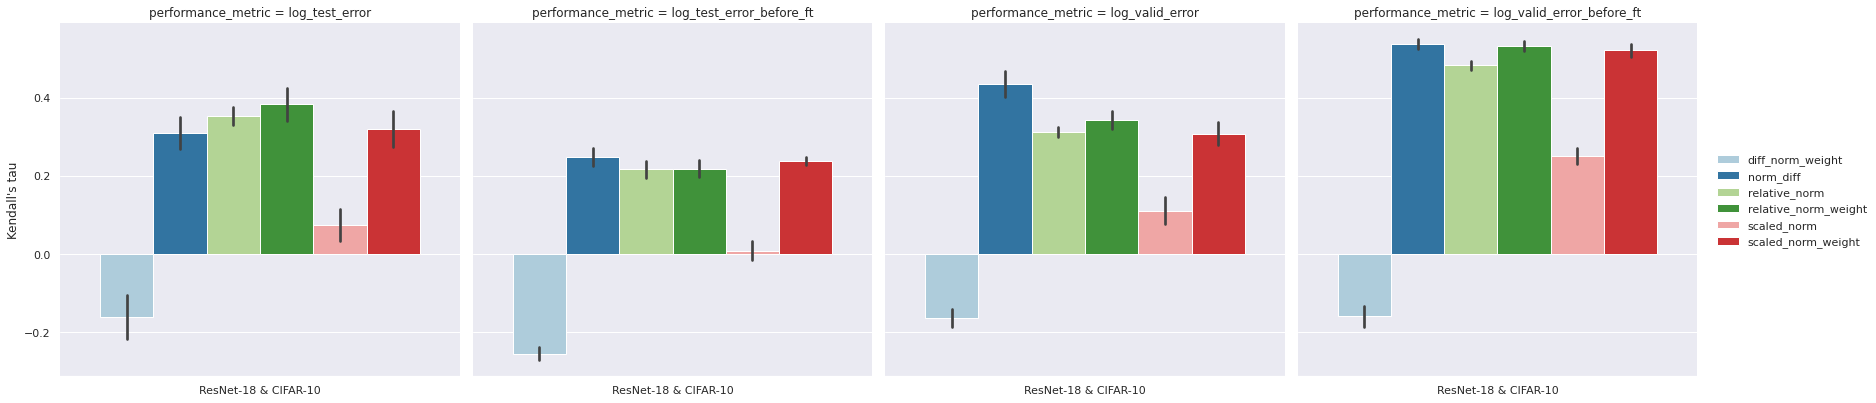

In [74]:
titles = [
    'Performance measure'
]

hue_order = ['Relative Weights','Relative Features','Scaled Weights','Scaled Features','Absolute Weights','Absolute Features']
col_order = ['ResNet-18 & CIFAR-10','GaripovNet & CIFAR-10','GaripovNet & F-MNIST']

g = sns.catplot(
    data=tmp,
    kind="bar",
    x="model & dataset",
    y="kt",
    hue="approximation_error",
    ci="sd", 
    palette=sns.color_palette("Paired"), # "dark", 
    # alpha=.6, 
    height=6,
    col= 'performance_metric',# "model & dataset",
    # row="model", 
    # hue_order=hue_order,
    # order=col_order,
)
g.despine(left=True)
g.set_axis_labels("", "Kendall's tau")
# g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
g.legend.set_title("")
# for i in range(1):
#     for j in range(2):
#         gax = g.axes[i][j]
#         # xlabel = gax.get_xlabel()
#         # ylabel = gax.get_ylabel()
#         # print(xlabel)
#         # if xlabel in replacements.keys():
#         #     print(xlabel)
#         #     g.axes[i][j].set_xlabel(replacements[xlabel])

#         gax.set_xticklabels(gax.get_xticklabels(),rotation = 15, fontdict={'horizontalalignment':'right'})# 'center', 'left', 'right')
        # gax.set_title(performance_measures[j])

In [75]:
df.layers.unique() # 'nr' 'layers'

[63, 60, 28, 38, 41, 44, 15, 19]
Categories (8, int64): [63, 60, 28, 38, 41, 44, 15, 19]

In [76]:
dfs = split_into_run(df, 5)

model = 'ResNet-18'
dataset = 'CIFAR-10'
performs = ['log_valid_error_before_ft','log_valid_error','log_test_error_before_ft','log_test_error']
approxs = ['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff']
N = 5

df_facts_ = pd.DataFrame(columns=['kt','layer', 'run', 'performance_metric', 'approximation_error','model','dataset'])
# df_means = pd.DataFrame(columns=approxs, index=performs)
# df_mean_factorizations = pd.DataFrame(columns=['kt','run', 'performance_metric', 'approximation_error','model','dataset'])

# array = np.zeros((len(performs),len(approxs),len(factorizations),N))

ranks = df.actual_rank.unique()
layers = df.layers.unique()
for p, perform in enumerate(performs):
    for a, approx in enumerate(approxs):
        for i in range(len(dfs)):
            # select i-th runs
            df_i = dfs[i]
            for r in ranks:
                df_i_r = df_i[df_i.actual_rank == r]
                # select rows where rank == r
                for l in layers:
                    df_i_r_l = df_i_r[df_i_r.layers == l]
                    # select rows where factorization == d
                    # kt over df_layers
                    c, _ = kendalltau_a(df_i_r_l[perform],df_i_r_l[approx])
                    df_facts_ = df_facts_.append({
                        'layer':l,
                        'performance_metric':perform,
                        'approximation_error':approx,
                        'kt': c,
                        'model': model,
                        'dataset': dataset,
                        'rank': r,
                        'run': i,
                    }, ignore_index=True)

df_facts_.to_pickle("./tables/kta_rn18_c10_bar_log_error_across_facts_incl75-9.zip")

In [84]:
dfs = split_into_run(df, 5)

model = 'ResNet-18'
dataset = 'CIFAR-10'
performs = ['log_test_error_before_ft','log_test_error'] # 'log_valid_error_before_ft','log_valid_error',
# performs = ['log_valid_error_before_ft','log_valid_error','log_test_error_before_ft','log_test_error']
approxs = ['relative_norm_weight','relative_norm','scaled_norm_weight','scaled_norm','diff_norm_weight','norm_diff']
N = 5

df_layer_fact_ = pd.DataFrame(columns=['kt','layer', 'run', 'performance_metric', 'approximation_error','model','dataset'])
# df_means = pd.DataFrame(columns=approxs, index=performs)
# df_mean_factorizations = pd.DataFrame(columns=['kt','run', 'performance_metric', 'approximation_error','model','dataset'])

# array = np.zeros((len(performs),len(approxs),len(factorizations),N))

ranks = df.actual_rank.unique()
# layers = df.layers.unique()
for p, perform in enumerate(performs):
    for a, approx in enumerate(approxs):
        for i in range(len(dfs)):
            # select i-th runs
            df_i = dfs[i]
            for r in ranks:
                df_i_r = df_i[df_i.actual_rank == r]
                # select rows where rank == r
                # for l in layers:
                    # df_i_r_l = df_i_r[df_i_r.layers == l]
                    # select rows where factorization == d
                    # kt over df_layers
                c, _ = kendalltau_a(df_i_r[perform],df_i_r[approx])
                print(f'{approx=}', f'{r=}', f'{i=}', f'{c=}')
                df_layer_fact_ = df_layer_fact_.append({
                    # 'layer':l,
                    'performance_metric':perform,
                    'approximation_error':approx,
                    'kt': c,
                    'model': model,
                    'dataset': dataset,
                    'rank': r,
                    'run': i,
                }, ignore_index=True)

df_layer_fact_.to_pickle("./tables/kta_rn18_c10_bar_log_error_across_layer_facts_incl75-9.zip")

approx='relative_norm_weight' r=0.1 i=0 c=0.6630434782608695
approx='relative_norm_weight' r=0.25 i=0 c=0.45652173913043476
approx='relative_norm_weight' r=0.9 i=0 c=-0.03666666666666667
approx='relative_norm_weight' r=0.5 i=0 c=0.26811594202898553
approx='relative_norm_weight' r=0.75 i=0 c=0.25
approx='relative_norm_weight' r=0.1 i=1 c=0.6304347826086957
approx='relative_norm_weight' r=0.25 i=1 c=0.42391304347826086
approx='relative_norm_weight' r=0.9 i=1 c=0.0
approx='relative_norm_weight' r=0.5 i=1 c=0.2463768115942029
approx='relative_norm_weight' r=0.75 i=1 c=0.25
approx='relative_norm_weight' r=0.1 i=2 c=0.6485507246376812
approx='relative_norm_weight' r=0.25 i=2 c=0.4384057971014493
approx='relative_norm_weight' r=0.9 i=2 c=-0.043478260869565216
approx='relative_norm_weight' r=0.5 i=2 c=0.2644927536231884
approx='relative_norm_weight' r=0.75 i=2 c=0.25
approx='relative_norm_weight' r=0.1 i=3 c=0.6557971014492754
approx='relative_norm_weight' r=0.25 i=3 c=0.48188405797101447
appr

# Pearson Correlation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [ ]:
from scipy.stats import pearsonr

# scipy.stats.kendalltau(x, y, initial_lexsort=None, nan_policy='propagate', method='auto', variant='b', alternative='two-sided')

errors = ['error', 'relative_norm','scaled_norm','norm_diff']
metrics = ['valid_acc_before_ft','valid_acc','test_acc_before_ft','test_acc']

df_pr = pd.DataFrame(index=metrics, columns=errors)

for error in errors:
    for metric in metrics:
        corr, p = pearsonr(df[error], df[metric])
        df_pr[error][metric] = corr

KeyError: 'error'

In [ ]:
df_pr.rename(index=neat_table_indices,columns=neat_table_columns, inplace=True)

print(df_kt.to_latex(
    float_format="{:0.2f}".format, 
    position='htbp', 
    caption="Pearson's rho from ResNet18 on CIFAR10 for different combinations approximation errors and performance measures. The rows correspond to accuracies measured on the validation (Val.) and test set, before and after fine-tuning (f.t.). The norms on the features are based on the training features. The relative, scaled, and absolute norms correspond to Eq. (3), (2), and (1) respectively. All are significantly different from zero at 1\% significance level.",
    label='pr_rn18_c10_errors_performances',
))

\begin{table}[htbp]
\centering
\caption{Pearson's rho from ResNet18 on CIFAR10 for different combinations approximation errors and performance measures. The rows correspond to accuracies measured on the validation (Val.) and test set, before and after fine-tuning (f.t.). The norms on the features are based on the training features. The relative, scaled, and absolute norms correspond to Eq. (3), (2), and (1) respectively. All are significantly different from zero at 1\% significance level.}
\label{pr_rn18_c10_errors_performances}
\begin{tabular}{llllllll}
\toprule
{} & relative\_norm\_weight & Relative-features & scaled\_norm\_weight & Scaled-features & diff\_norm\_weight & Absolute-features & layers \\
\midrule
log\_valid\_error\_before\_ft &                 0.68 &              0.68 &               0.55 &            0.42 &            0.07* &              0.64 &  -0.45 \\
log\_valid\_error           &                 0.56 &              0.55 &               0.46 &            0.35 &     

In [ ]:
df_pr_layers = pd.DataFrame(
    index=layers,
    columns=errors_metrics,
)

for layer in df.layers.unique():
    df_layer = df[df.layers==layer]
    for error in errors:
        for metric in metrics:
            corr, p = pearsonr(df_layer[error], df_layer[metric])
            df_pr_layers[f'{error}-{metric}'][str(layer)] = (corr, p)

KeyError: 'error'

In [ ]:
df_pr_layers

relative_norm_weight-log_valid_error_before_ft  \
15                                            NaN   
19                                            NaN   
28                                            NaN   
38                                            NaN   
41                                            NaN   
44                                            NaN   
60                                            NaN   
63                                            NaN   

   relative_norm_weight-log_valid_error  \
15                                  NaN   
19                                  NaN   
28                                  NaN   
38                                  NaN   
41                                  NaN   
44                                  NaN   
60                                  NaN   
63                                  NaN   

   relative_norm_weight-log_test_error_before_ft  \
15                                           NaN   
19                                           NaN   
28                                           NaN   
38                                           NaN   
41                                           NaN   
44                                           NaN   
60                                           NaN   
63                                           NaN   

   relative_norm_weight-log_test_error  \
15                                 NaN   
19                                 NaN   
28                                 NaN   
38                                 NaN   
41                                 NaN   
44                                 NaN   
60                                 NaN   
63                                 NaN   

   relative_norm-log_valid_error_before_ft relative_norm-log_valid_error  \
15                                     NaN                           NaN   
19                                     NaN                           NaN   
28                                     NaN                           NaN   
38                                     NaN                           NaN   
41                                     NaN                           NaN   
44                                     NaN                           NaN   
60                                     NaN                           NaN   
63                                     NaN                           NaN   

   relative_norm-log_test_error_before_ft relative_norm-log_test_error  \
15                                    NaN                          NaN   
19                                    NaN                          NaN   
28                                    NaN                          NaN   
38                                    NaN                          NaN   
41                                    NaN                          NaN   
44                                    NaN                          NaN   
60                                    NaN                          NaN   
63                                    NaN                          NaN   

   scaled_norm_weight-log_valid_error_before_ft  \
15                                          NaN   
19                                          NaN   
28                                          NaN   
38                                          NaN   
41                                          NaN   
44                                          NaN   
60                                          NaN   
63                                          NaN   

   scaled_norm_weight-log_valid_error  ...  \
15                                NaN  ...   
19                                NaN  ...   
28                                NaN  ...   
38                                NaN  ...   
41                                NaN  ...   
44                                NaN  ...   
60                                NaN  ...   
63                                NaN  ...   

   diff_norm_weight-log_test_error_before_ft diff_norm_weight-

KeyError: 'error'

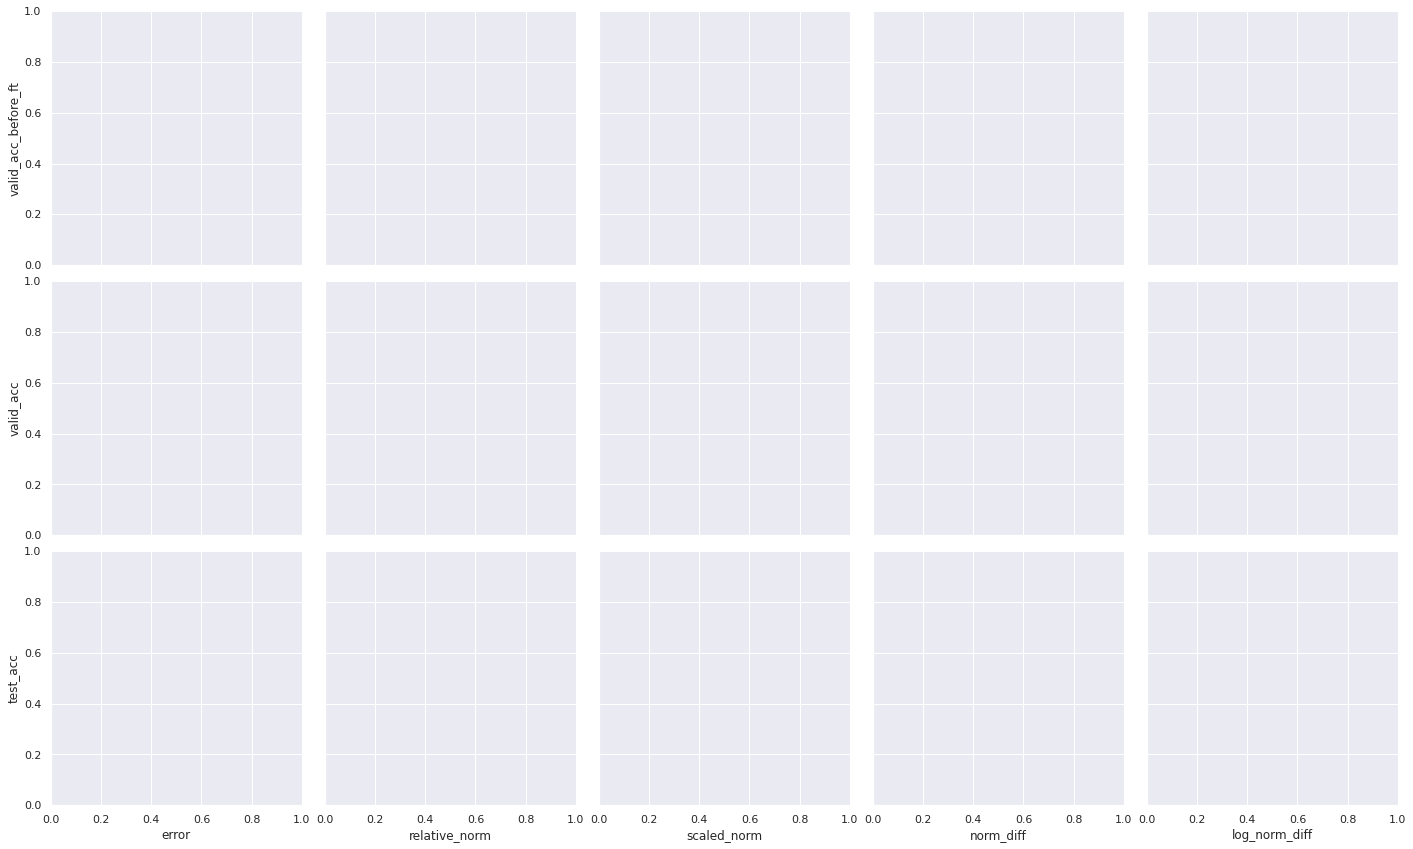

In [ ]:
g = sns.PairGrid(
    df,
    y_vars=["valid_acc_before_ft", "valid_acc","test_acc"], 
    x_vars=["error", "relative_norm", "scaled_norm","norm_diff" ,"log_norm_diff"],
    hue="layers",
    height=4,
    # style="factorization",
) #, height=4)
g.map(sns.regplot) # color=".3")
g.set(ylim=(0.86,0.925))
# g.set(ylim=(-1, 11), yticks=[0, 5, 10])
g.add_legend()

lines = {
    0: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    1: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    2: {
        "y":baseline_result['test_acc'],
        "color":'black',
    },
}

for i in range(3):
    for j in range(5):
        gax = g.axes[i][j]
        gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

g.savefig("../../plots/cifar10/rn18/rn18_c10_linear_errors_performances_layers")

In [51]:
replacements = {
    'valid_acc_before_ft': "Validation accuracy before fine-tuning", 
    'valid_acc': "Validation accuracy after fine-tuning",
    'test_acc': "Test accuracy after fine-tuning", 
    'relative_norm_weight': 'Relative Weights',
    'scaled_norm_weight': 'Scaled Weights',
    'diff_norm_weight': 'Absolute Weights',
    'relative_norm': 'Relative Features',
    'scaled_norm': 'Scaled Features',
    'norm_diff': 'Absolute Features',
    'log_valid_error_before_ft': 'Log Validation error before fine-tuning',
    'log_valid_error': 'Log Validation error after fine-tuning',
    'log_test_error': 'Log Test error after fine-tuning'
    # 'log_norm_diff': 'Log norm of the Absolute between training features',
}

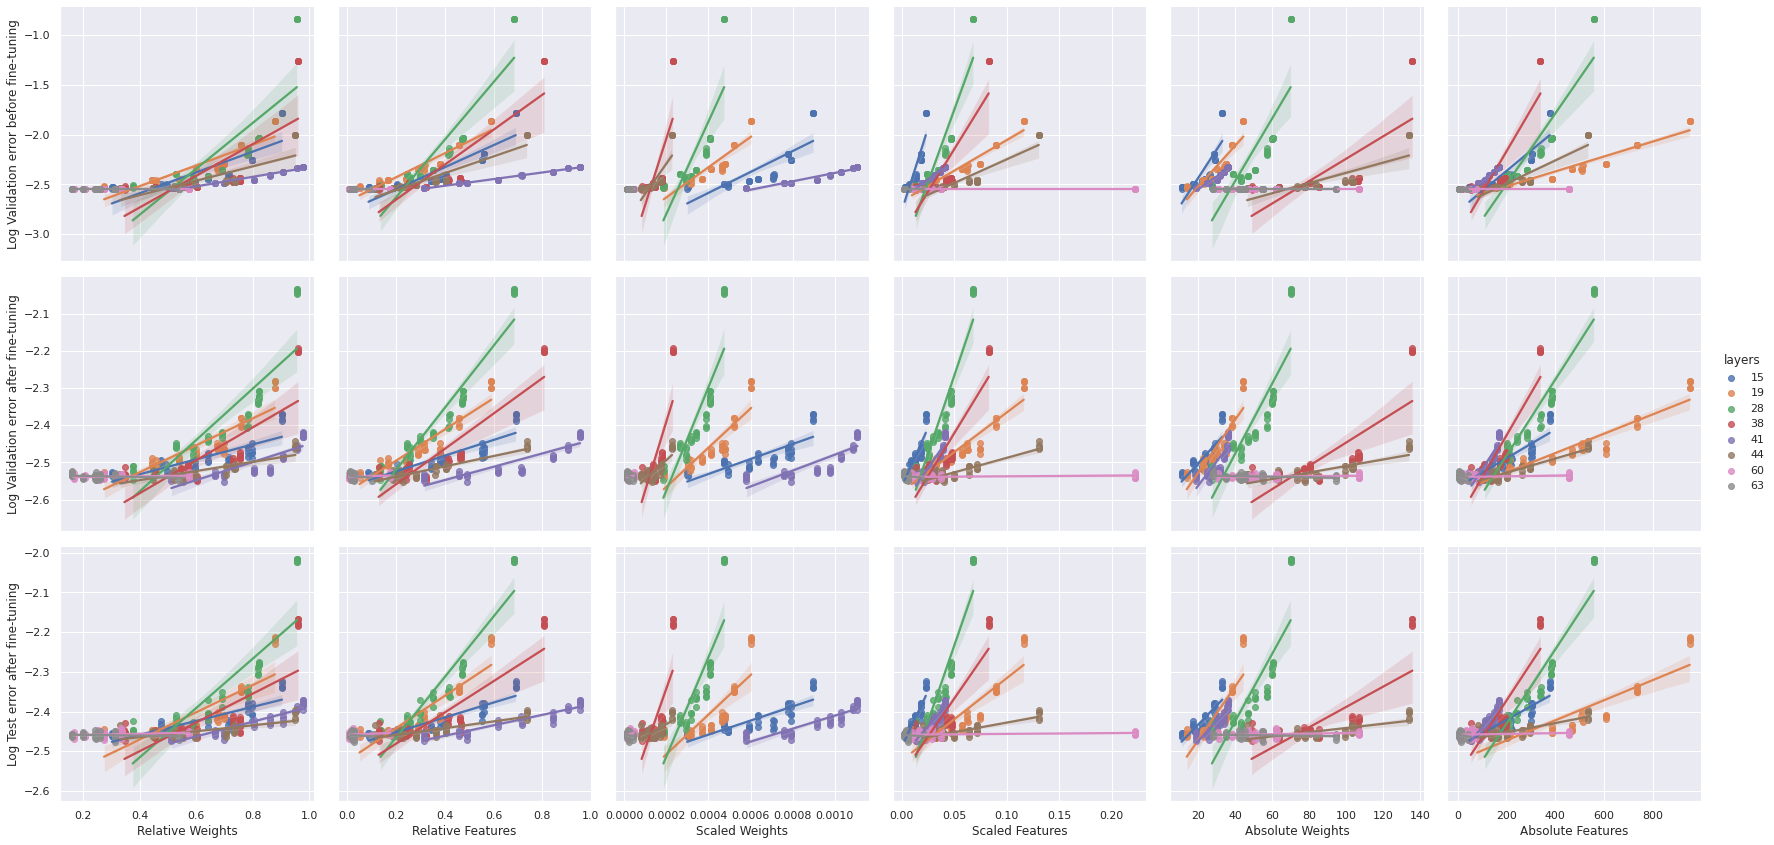

In [52]:
g = sns.PairGrid(
    df,
    y_vars=metrics, # ["valid_error_before_ft", "log_valid_error","log_test_error"], 
    x_vars=errors, # ["relative_norm", "scaled_norm","norm_diff"],# ,"log_norm_diff"],
    hue="layers",
    height=4,
    # style="factorization",
) #, height=4)
g.map(sns.regplot) # color=".3")
# g.set(ylim=(0.86,0.925))
# g.set(ylim=(-1, 11), yticks=[0, 5, 10])
g.add_legend()

lines = {
    0: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    1: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    2: {
        "y":baseline_result['test_acc'],
        "color":'black',
    },
}

for i in range(3):
    for j in range(6):
        gax = g.axes[i][j]
        # gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

g.savefig("../../plots/cifar10/rn18/rn18_c10_linear_errors_performances_layers")

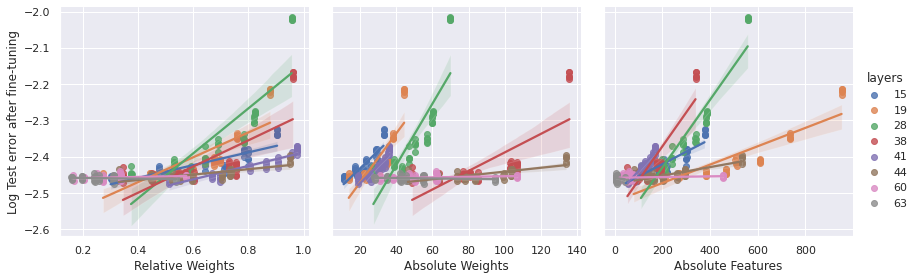

In [53]:
metrics = ['log_test_error']
errors = ["relative_norm_weight", "diff_norm_weight", "norm_diff",]
    # 'relative_norm_weight': 'Relative Weights',
    # 'scaled_norm_weight': 'Scaled Weights',
    # 'diff_norm_weight': 'Absolute Weights',
    # 'relative_norm': 'Relative Features',
    # 'scaled_norm': 'Scaled Features',
    # 'norm_diff': 'Absolute Features',

g = sns.PairGrid(
    df,
    y_vars=metrics, # ["valid_error_before_ft", "log_valid_error","log_test_error"], 
    x_vars=errors, # ["relative_norm", "scaled_norm","norm_diff"],# ,"log_norm_diff"],
    hue="layers",
    height=4,
    # style="factorization",
) #, height=4)
g.map(sns.regplot) # color=".3")
# g.set(ylim=(0.86,0.925))
# g.set(ylim=(-1, 11), yticks=[0, 5, 10])
g.add_legend()

lines = {
    0: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    1: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    2: {
        "y":baseline_result['test_acc'],
        "color":'black',
    },
}

for i in range(1):
    for j in range(3):
        gax = g.axes[i][j]
        # gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

g.savefig("../../plots/cifar10/rn18/rn18_c10_linear_ltd-approx_test-after-ft_layers")

KeyError: 'error'

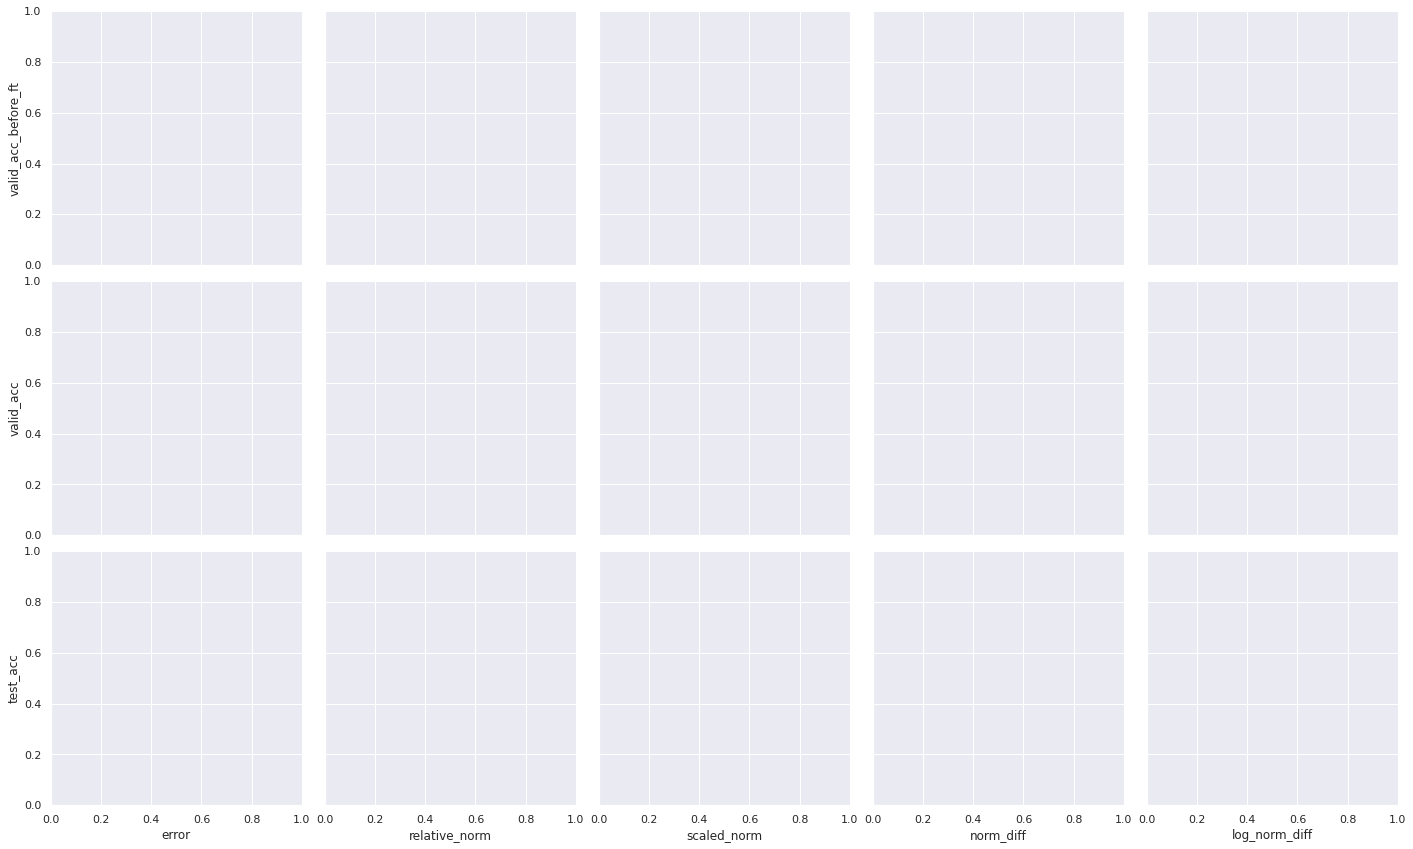

In [ ]:
g = sns.PairGrid(
    df,
    y_vars=["valid_acc_before_ft", "valid_acc","test_acc"], 
    x_vars=["error", "relative_norm", "scaled_norm" ,"norm_diff","log_norm_diff"],
    hue="layers",
    height=4,
    # style="factorization",
) #, height=4)
g.map(lambda x, y, **kwargs: sns.regplot(x=x,y=y,order=2)) # sns.scatterplot(x=x,y=y,hue=df.layers,style=df.factorization,legend='auto')
g.set(ylim=(0.86,0.925))
# g.set(ylim=(-1, 11), yticks=[0, 5, 10])
g.add_legend()

lines = {
    0: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    1: {
        "y":baseline_result['best_valid_acc'],
        "color":'black',
    },
    2: {
        "y":baseline_result['test_acc'],
        "color":'black',
    },
}

for i in range(3):
    for j in range(5):
        gax = g.axes[i][j]
        gax.axhline(**(lines[i]))
        xlabel = gax.get_xlabel()
        ylabel = gax.get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

# plt.legend(
#     bbox_to_anchor=(1.05, 1,1,1),
#     loc='upper left', borderaxespad=0.
# )
# g.savefig("../../plots/cifar10/rn18/rn18_c10_poly2_errors_performances_layers")

In [ ]:
from statsmodels.api import OLS

errors = ['error', 'relative_norm','scaled_norm','norm_diff']
metrics = ['valid_acc_before_ft','valid_acc','test_acc']

df_ols = pd.DataFrame(index=metrics, columns=errors)

for error in errors:
    for metric in metrics:
        res = OLS(df[metric], df[error], hasconst=True).fit()
        print(res.summary())
        # df_kt[error][metric] = (corr, p)

KeyError: 'error'

In [178]:



df_pr_layers = pd.DataFrame(
    index=layers,
    columns=errors_metrics,
)

for layer in df.layers.unique():
    df_layer = df[df.layers==layer]
    for error in errors:
        for metric in metrics:
            corr, p = pearsonr(df_layer[error], df_layer[metric])
            df_pr_layers[f'{error}-{metric}'][str(layer)] = (corr, p)

/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [179]:
df_pr_layers

relative_norm_weight-log_valid_error_before_ft  \
15                                            NaN   
19                                            NaN   
28                                            NaN   
38                                            NaN   
41                                            NaN   
44                                            NaN   
60                                            NaN   
63                                            NaN   

   relative_norm_weight-log_valid_error  \
15                                  NaN   
19                                  NaN   
28                                  NaN   
38                                  NaN   
41                                  NaN   
44                                  NaN   
60                                  NaN   
63                                  NaN   

   relative_norm_weight-log_test_error_before_ft  \
15                                           NaN   
19                                           NaN   
28                                           NaN   
38                                           NaN   
41                                           NaN   
44                                           NaN   
60                                           NaN   
63                                           NaN   

   relative_norm_weight-log_test_error  \
15                                 NaN   
19                                 NaN   
28                                 NaN   
38                                 NaN   
41                                 NaN   
44                                 NaN   
60                                 NaN   
63                                 NaN   

   relative_norm-log_valid_error_before_ft relative_norm-log_valid_error  \
15                                     NaN                           NaN   
19                                     NaN                           NaN   
28                                     NaN                           NaN   
38                                     NaN                           NaN   
41                                     NaN                           NaN   
44                                     NaN                           NaN   
60                                     NaN                           NaN   
63                                     NaN                           NaN   

   relative_norm-log_test_error_before_ft relative_norm-log_test_error  \
15                                    NaN                          NaN   
19                                    NaN                          NaN   
28                                    NaN                          NaN   
38                                    NaN                          NaN   
41                                    NaN                          NaN   
44                                    NaN                          NaN   
60                                    NaN                          NaN   
63                                    NaN                          NaN   

   scaled_norm_weight-log_valid_error_before_ft  \
15                                          NaN   
19                                          NaN   
28                                          NaN   
38                                          NaN   
41                                          NaN   
44                                          NaN   
60                                          NaN   
63                                          NaN   

   scaled_norm_weight-log_valid_error  ...  \
15                                NaN  ...   
19                                NaN  ...   
28                                NaN  ...   
38                                NaN  ...   
41                                NaN  ...   
44                                NaN  ...   
60                                NaN  ...   
63                                NaN  ...   

   diff_norm_weight-log_test_error_before_ft diff_norm_weight-